In [7]:
import pandas as pd
import importlib, matplotlib.pyplot as plt
import seaborn as sns

# Özet

Raporda ilk olarak hangi veri setinin seçildiği ve  raporun hedefi belirtilmiştir. Ardından rapora konu olan verilerin istatistiksel özeti yapılmış, verilerde eksik ve aykırı değerler olup olmadığı incelenmiştir. Daha sonra veriler incelenerek, aralarında anlamlı ilişki bulunabilecek veri kümeleri belirlenmiş ve bu ilişkileri en anlamlı ve okunaklı şekilde ortaya koyabilecek grafik türleri tespit edilmiştir. Grafiklerin kodlaması ve her grafiğin ardından yapılan analizlerle birlikte rapora konu olan verilerin değerlendirilmesi yapılmıştır. Son olarak raporlama kısmında bu değerlendirmeler özetlenmiş ve raporun hedefi doğrultusunda ortaya çıkan sonuçlar ele alınmışlardır.

#**1. Veri Seti Seçimi**

Projede incelenmek üzere **customer_experience_data** seti seçilmiştir.

Setteki değişkenler göz önüne alındığında bu raporun sonucunda **müşteri sadakatinin (Retention_Status)**
  - Genel ve segment bazında durumunun **(Yaş(Age), Cinsiyet(Gender), Konum(Location))**,
  - Güçlü olup olmadığının ve bu durumun hangi faktörlerle ilişkili olduğunun **(Satın Alınan Ürün Sayısı(Products_Purchased), Geri Bildirim Puanı(Feedback_Score), Memnuniyet Puanı(Satisfaction_Score))**,
  - Bu faktörlerin ise diğer değişkenlerden nasıl etkilendiğinin **(Etkileşim Sayısı(Num_Interactions), Sitede Geçirilen Süre(Time_Spent_on_Site), Görüntülenen Ürün Sayısı(Products_Viewed))**

anlaşılması hedeflenmektedir. Yine benzer şekilde satın alma davranışlarının **(Satın Alınan Ürün Sayısı(Products_Purchased))** ve müşteri memnuniyetinin **(Memnuniyet Puanı(Satisfaction_Score))** segment bazında durumu ve diğer değişkenlerle ilişkisi irdelenmiştir. Bu ilişkilerin anaizi neticesinde, müşteri sadakati, memnuniyeti ve satılan ürün sayısının arttırılması hedefine yönelik çıkarımlar yapmak, karar almak ve aksiyon planı hazırlamak mümkün olacaktır.

In [8]:
url = "https://raw.githubusercontent.com/dsoztorun/bitirme_projesi_1_dsoztorun/refs/heads/main/customer_experience_data.csv?token=GHSAT0AAAAAADFUW3EVB6DALM635OQHMNTQ2C3HZEQ"
c_exp1 = pd.read_csv(url)
c_exp = c_exp1.copy()

In [9]:
c_exp1.head()

,Customer_ID,Age,Gender,Location,Num_Interactions,Feedback_Score,Products_Purchased,Products_Viewed,Time_Spent_on_Site,Satisfaction_Score,Retention_Status,Gender_Encoded,Location_Encoded,Retention_Status_Encoded
0,1,56,Male,Urban,11,4,18,38,18.319606,7,Retained,1,2,1
1,2,69,Male,Suburban,10,3,2,17,9.015198,6,Retained,1,1,1
2,3,46,Male,Urban,5,5,11,46,45.921572,10,Churned,1,2,0
3,4,32,Female,Suburban,5,1,6,13,44.105053,5,Churned,0,1,0
4,5,60,Male,Urban,14,5,8,46,17.897471,1,Retained,1,2,1


In [10]:
c_exp = c_exp1.copy() # Orijinal veriyi korumak amacıyla kopya alınmıştır.
c_exp.shape

(1000, 14)

In [11]:
c_exp.info() # Burada verilerin kategorik mi sayısal mı olduğu net biçimde görülmektedir.
             # Non-Null Count kısmında, sette hiçbir değişkende eksik verinin olmadığı görülmektedir. Yine de ayrıca incelenecektir.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_ID               1000 non-null   int64  
 1   Age                       1000 non-null   int64  
 2   Gender                    1000 non-null   object 
 3   Location                  1000 non-null   object 
 4   Num_Interactions          1000 non-null   int64  
 5   Feedback_Score            1000 non-null   int64  
 6   Products_Purchased        1000 non-null   int64  
 7   Products_Viewed           1000 non-null   int64  
 8   Time_Spent_on_Site        1000 non-null   float64
 9   Satisfaction_Score        1000 non-null   int64  
 10  Retention_Status          1000 non-null   object 
 11  Gender_Encoded            1000 non-null   int64  
 12  Location_Encoded          1000 non-null   int64  
 13  Retention_Status_Encoded  1000 non-null   int64  
dtypes: float6

#**2. İstatistiksel Özet**

Bu bölümde, veri setinde yer alan sayısal değişkenler için **.describe()** fonksiyonu ile temel istatistiksel ölçümler ortaya konulmuştur. Her bir değişken için ortalama (mean), standart sapma (std), minimum (min), medyan (50%), ve maksimum (max) gibi temel istatistik değerler belirtilmiştir. Bu sayede verinin genel yapısı, merkezi eğilim ölçüleri ve dağılımı hakkında fikir edinilmiştir.

In [12]:
c_exp[['Age','Num_Interactions','Time_Spent_on_Site','Products_Viewed',
       'Products_Purchased','Feedback_Score','Satisfaction_Score']].describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
Age,1000.0,43.82,14.99,18.00,31.00,44.00,56.00,69.00
Num_Interactions,1000.0,7.54,4.02,1.00,4.00,8.00,11.00,14.00
Time_Spent_on_Site,1000.0,32.27,15.73,5.11,18.84,32.46,45.93,59.95
Products_Viewed,1000.0,27.37,12.94,5.00,17.00,27.50,38.00,49.00
Products_Purchased,1000.0,10.42,5.35,1.00,6.00,11.00,15.00,19.00
Feedback_Score,1000.0,2.98,1.42,1.00,2.00,3.00,4.00,5.00
Satisfaction_Score,1000.0,5.54,2.90,1.00,3.00,6.00,8.00,10.00


#**3. Eksik Değer Analizi:**

Yapılan analiz sonucunda eksik veri toplamının "0" olduğu görülmüştür, yani veri setinde hiçbir değişkende eksik değer bulunmamaktadır. Bu nedenle eksik veri temizleme veya doldurma işlemlerine ihtiyaç duyulmamıştır.

*Eğer toplam '0' olmasaydı, ''' c_exp.isnull().sum() ''' kodu ile değişken bazında eksik tespiti yapabilirdik.*

In [13]:
c_exp.isnull().sum()

,0
Customer_ID,0
Age,0
Gender,0
Location,0
Num_Interactions,0
Feedback_Score,0
Products_Purchased,0
Products_Viewed,0
Time_Spent_on_Site,0
Satisfaction_Score,0


#**4. Aykırı Değer Analizi:**

Veri setindeki sayısal değişkenler için IQR (Interquartile Range) yöntemiyle aykırı değer analizi yapılmıştır.

Bu analizde her bir değişkenin alt ve üst sınırları şu şekilde hesaplanmıştır:

- Alt sınır: Q1 – 1.5 × IQR  
- Üst sınır: Q3 + 1.5 × IQR

Yapılan analiz sonucunda, bu değişkenlerin hiçbirinde aykırı değer tespit edilmemiştir. Verinin dağılımı normal sınırlar içerisinde kalmakta, aşırı uç gözlemler bulunmamaktadır. Bu nedenle herhangi bir aykırı değer temizleme veya düzeltme işlemine ihtiyaç duyulmamıştır.

In [14]:
numeric_cols = ['Age', 'Num_Interactions', 'Time_Spent_on_Site','Products_Viewed',
                'Products_Purchased','Feedback_Score', 'Satisfaction_Score']

for i in numeric_cols:
    aralik = c_exp[i].quantile(.75) - c_exp[i].quantile(.25)
    aykiri = c_exp[(c_exp[i] < c_exp[i].quantile(.25) - 1.5 * aralik) |
                (c_exp[i] > c_exp[i].quantile(.75) + 1.5 * aralik)][i]
    if len(aykiri) != 0:
      print(f"{i}: {len(aykiri)} adet aykırı değer tespit edildi")
    else: print(f"{i}: Aykırı değer yok")

Age: Aykırı değer yok
Num_Interactions: Aykırı değer yok
Time_Spent_on_Site: Aykırı değer yok
Products_Viewed: Aykırı değer yok
Products_Purchased: Aykırı değer yok
Feedback_Score: Aykırı değer yok
Satisfaction_Score: Aykırı değer yok


#**5. Grafik ve Analizler**

Verinin yapısına bağlı olarak değişkenlerin tek başlarına ve birbiriyle ilişkilerini incelemek amacıyla çeşitli başlıklar altında grafikler hazırlanmış ve analiz edilmiştir. Ayrıca incelenen durumların bazılarında, değişkenlerin yapısına ve birbirleriyle ilişkilerine bağlı olarak gruplama yapılıp **(groupby())** çeşitli değerler **(mean, median, min, max)** özetlenmiştir.

Grafiklerin daha kolay anlaşılabilmesi için, değişken isimleri bazı yerlerde **.replace()** ile değiştirilmiştir. Benzer şekilde **.set_axis_labels()** ve ***plt.xlabel()**/ **plt.ylabel()** ile eksen isimleri, **.fig.suptitle()** ve **plt.title()** ile grafik isimleri Türkçeleştirilmiştir. Uygun grafiklerde **plt.figure(figsize=())** ile grafiğin büyüklüğü belirlenmiş, **sns.set_style("whitegrid")** ile görünümü grid ekli hale getirilmiştir. Ayrıca bazı grafiklerde **plt.tight_layout()** ile grafik yapılarının ve başlıkların düzenli kalması sağlanmıştır. **plt.show()** ise her grafiğin altına eklenerek, kodların farklı ortamlarda çalıştırılması durumunda otomatik olarak grafiklerin görünebilir olması sağlanmıştır. Grafiklerde **"hue"** parametresi ile segment ayrımları net bir şekilde gösterilmiş ve ayrımları netleştirmek amacıyla renk paleti olarak da **"vlag"** seçilmiştir.

##**Tekli Kategorik Değişkenler**

Kategorik değişkenler tek başlarına ya da bir başka kategorik değişkenle birlikte incelenirken kullanılabilecek en anlamlı grafik türü olarak **"catplot"** belirlenmiştir. Ayrıca grafiklerden önce **.value_counts(normalize=True)** formülü ile segmentler oransal olarak belirtilmiştir.

###**1. Cinsiyet (Gender)**

Gender
Male      0.524
Female    0.476
Name: proportion, dtype: float64


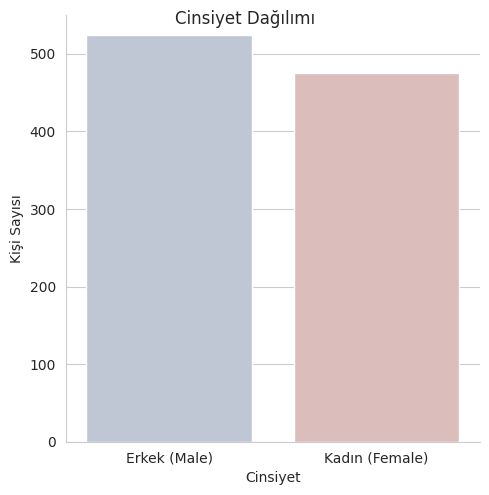

In [15]:
print(c_exp["Gender"].value_counts(normalize=True))
c_exp["Gender"] = c_exp["Gender"].replace({"Male": "Erkek (Male)","Female": "Kadın (Female)"})
sns.set_style("whitegrid")
gr_1 = sns.catplot(x="Gender",kind="count", data=c_exp, hue="Gender", legend=False, palette="vlag")
gr_1.set_axis_labels("Cinsiyet", "Kişi Sayısı").fig.suptitle("Cinsiyet Dağılımı",size=12)
plt.show()

Kullanıcıların %52’sinin erkek, %48’inin kadın olduğu görülen grafiğe göre cinsiyet dağılımı dengeli olup erkek kullanıcılar hafif çoğunluktadır.

###**2. Konum (Location)**

Location
Urban       0.344
Suburban    0.344
Rural       0.312
Name: proportion, dtype: float64


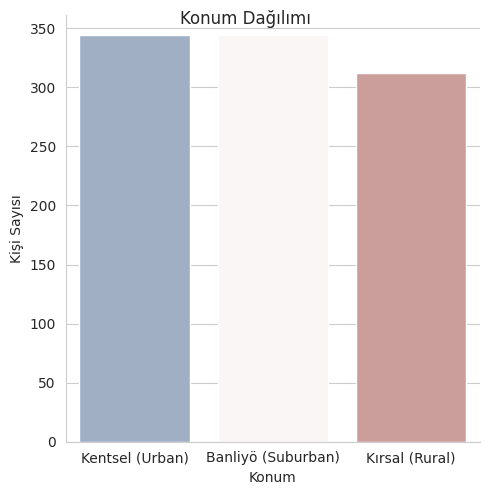

In [16]:
print(c_exp["Location"].value_counts(normalize=True))
c_exp["Location"] = c_exp["Location"].replace({
    "Urban": "Kentsel (Urban)","Suburban": "Banliyö (Suburban)", "Rural": "Kırsal (Rural)"})
sns.set_style("whitegrid")
gr_2 = sns.catplot(x="Location",kind="count", data=c_exp, hue="Location", legend=False, palette="vlag")
gr_2.set_axis_labels("Konum", "Kişi Sayısı")
gr_2.fig.suptitle("Konum Dağılımı",size=12)
plt.show()

Konuma göre dağılım dengeli olup, kentsel ve banliyö bölgeler eşit oranda (%34,4), kırsal bölge ise biraz daha düşük oranda (%31,2) görülmektedir.

###**3. Müşteri Durumu (Retention_Status)**

Retention_Status
Retained    0.694
Churned     0.306
Name: proportion, dtype: float64


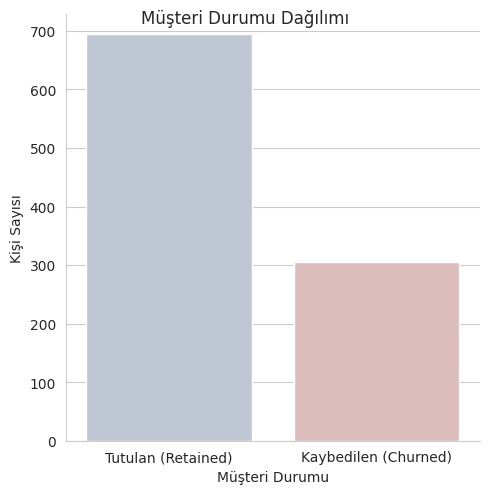

In [17]:
print(c_exp["Retention_Status"].value_counts(normalize=True))
c_exp["Retention_Status"] = c_exp["Retention_Status"].replace({
    "Retained": "Tutulan (Retained)","Churned": "Kaybedilen (Churned)"})
sns.set_style("whitegrid")
gr_3 = sns.catplot(x="Retention_Status",kind="count", data=c_exp, hue="Retention_Status", legend = False, palette = "vlag")
gr_3.set_axis_labels("Müşteri Durumu", "Kişi Sayısı")
gr_3.fig.suptitle("Müşteri Durumu Dağılımı",size=12)
plt.show()

Verilere göre müşterilerin %69,4’ü elde tutulurken %30,6’sı kaybedilmiştir. Bu durum genel olarak başarılı bir müşteri sadakati performansına işaret etmektedir.

##**Kategorik Değişkenlerin Birbiriyle İlişkisi**

###**4. Cinsiyet (Gender) ve Müşteri Durumu (Retention_Status) İlişkisi**

In [18]:
c_exp.groupby(["Retention_Status","Gender"],as_index=False).agg(Count=('Gender', 'size'))

,Retention_Status,Gender,Count
0,Kaybedilen (Churned),Erkek (Male),156
1,Kaybedilen (Churned),Kadın (Female),150
2,Tutulan (Retained),Erkek (Male),368
3,Tutulan (Retained),Kadın (Female),326


Gender
Erkek (Male)      0.524
Kadın (Female)    0.476
Name: proportion, dtype: float64


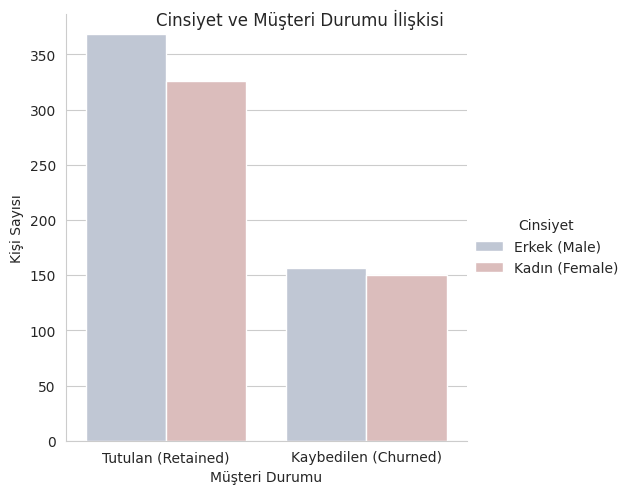

In [19]:
print(c_exp["Gender"].value_counts(normalize=True))
sns.set_style("whitegrid")
gr_4 = sns.catplot(x="Retention_Status", kind="count", hue="Gender", data=c_exp, palette="vlag")
gr_4.set_axis_labels("Müşteri Durumu", "Kişi Sayısı")
gr_4.fig.suptitle("Cinsiyet ve Müşteri Durumu İlişkisi", size=12)
gr_4._legend.set_title("Cinsiyet")
plt.show()

Müşteri sadakati cinsiyet segmentine göre incelendiğinde, her iki segmentte de tutulan müşteri sayısının kaybedilen sayısından fazla olmakla birlikte, erkek müşterilerde tutulma oranının kadınlara göre biraz daha yüksek olduğu gözlenmektedir. Ancak fark çok büyük olmadığından, müşteri sadakatinin diğer faktörlerin de göz önüne alınarak değerlendirilmesi gerekmektedir.

###**5. Konum (Location) ve Müşteri Durumu (Retention_Status) İlişkisi**

In [20]:
c_exp.groupby(["Location","Retention_Status"],as_index=False).agg(Count=('Retention_Status', 'size'))

,Location,Retention_Status,Count
0,Banliyö (Suburban),Kaybedilen (Churned),93
1,Banliyö (Suburban),Tutulan (Retained),251
2,Kentsel (Urban),Kaybedilen (Churned),123
3,Kentsel (Urban),Tutulan (Retained),221
4,Kırsal (Rural),Kaybedilen (Churned),90
5,Kırsal (Rural),Tutulan (Retained),222


Location
Kentsel (Urban)       0.344
Banliyö (Suburban)    0.344
Kırsal (Rural)        0.312
Name: proportion, dtype: float64


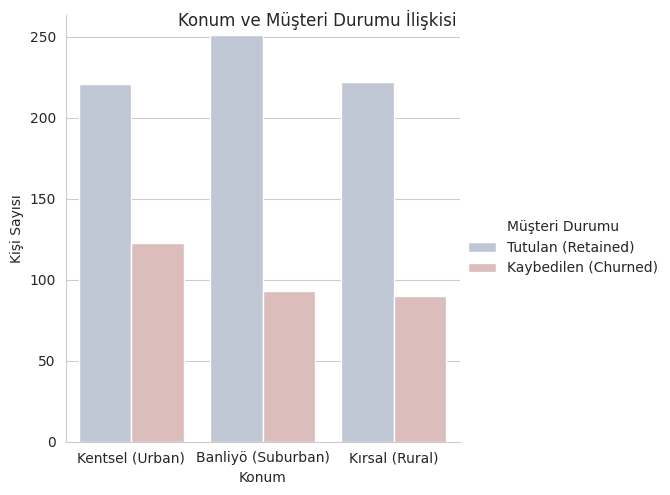

In [21]:
print(c_exp["Location"].value_counts(normalize=True))
sns.set_style("whitegrid")
gr_5 = sns.catplot(x="Location", kind="count", hue="Retention_Status", data=c_exp, palette="vlag")
gr_5.set_axis_labels("Konum", "Kişi Sayısı")
gr_5.fig.suptitle("Konum ve Müşteri Durumu İlişkisi",size=12)
gr_5._legend.set_title("Müşteri Durumu")
plt.show()

Tüm bölgelerde tutulan müşteri sayısı kaybedilen sayısının yaklaşık 2-3 katıdır.

Kentsel(Urban) ve Banliyö(Suburban) bölgelerde incelenen müşteri sayısı eşit olmakla birlikte, tüm bölgeler arasında **Banliyö**nün **en fazla müşteri tutulan**, **Kentsel**in ise aksine **en fazla müşteri kaybedilen** bölge olduğu görülmektedir. Bununla birlikte Kırsal(Rural) ve Kentsel bölgelerde tutulan müşteri sayısı neredeyse aynı iken, kaybedilen müşteri sayısı Kırsalda diğerine göre daha azdır.

  - **En fazla müşteriye sahip ve müşteri tutma başarısı diğer bölgelerden daha yüksek** görünen **Banliyo** bölgesine yönelik yatırım, kampanya ve hizmetler yüksek müşteri yoğunluğu nedeniyle stratejik öneme sahip olabilir.

  - **En fazla müşteri kaybeden** bölge olduğu görülen **Kentsel** bölgede müşteri sadakatini yükseltecek stratejileri geliştirme gereği görülebilir.

  - **Tutulan müşteri oranı yüksek olan Kırsal** bölge ise mevcut müşteri memnuniyetini koruma açısından avantajlı olarak değerlendirilebilir.

##**Kategorik ve Sayısal Değişkenlerin Birbiriyle İlişkisi**

Kategorik değişkenlerin sayısal değişkenlerle ilişkisini incelerken, anlaşılırlık yönünden en uygun grafik türleri olarak **"boxplot"** ve **"violinplot"** seçilmiştir.

###**6. Cinsiyet (Gender) ve Sitede Geçirilen Süre (Time_Spent_on_Site) İlişkisi**

In [22]:
c_exp.groupby('Gender')['Time_Spent_on_Site'].agg(['count','mean','median','min','max']).round(2)

,count,mean,median,min,max
Gender,,,,,
Erkek (Male),524,32.17,31.96,5.13,59.90
Kadın (Female),476,32.39,32.67,5.11,59.95


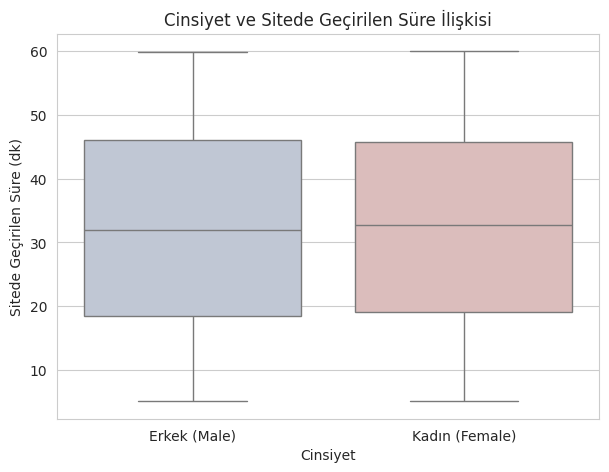

In [23]:
plt.figure(figsize=(7,5))
sns.set_style("whitegrid")
sns.boxplot(x="Gender", y="Time_Spent_on_Site", hue="Gender", data=c_exp, palette="vlag")
plt.title("Cinsiyet ve Sitede Geçirilen Süre İlişkisi")
plt.xlabel("Cinsiyet")
plt.ylabel("Sitede Geçirilen Süre (dk)")
plt.show()

Kadın müşteri sayısı daha az olmakla birlikte her iki cinsiyetin de sitede geçirdiği süreler oldukça benzerdir. Ortalama ve medyan süreler birbirine çok yakındır, bu da dağılımın dengeli olduğunu gösterir. Yine aynı şekilde minimum ve maksimum değerlerde de ciddi bir uç nokta farkı görünmemektedir. Bütün bu bilgiler ışığında **Cinsiyet** değişkeninin, sitede geçirilen süre üzerinde **belirgin bir fark yaratmadığı** söylenebilir.

###**7. Cinsiyet (Gender) ve Satın Alınan Ürün Sayısı (Products_Purchased) İlişkisi**

In [24]:
c_exp.groupby('Gender')['Products_Purchased'].agg(['count','mean','median','min','max']).round(2)

,count,mean,median,min,max
Gender,,,,,
Erkek (Male),524,10.26,11.0,1,19
Kadın (Female),476,10.59,11.0,1,19


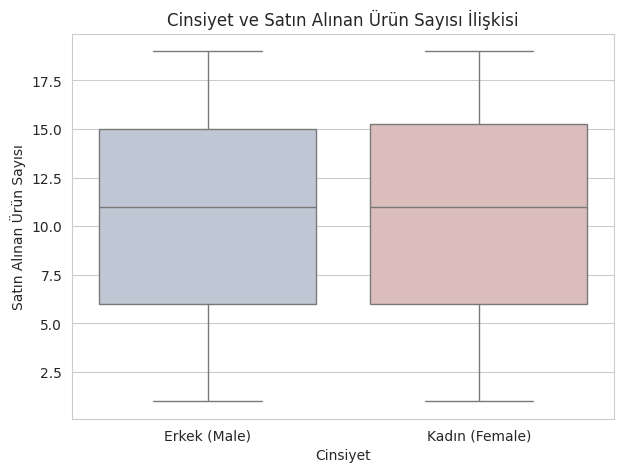

In [25]:
plt.figure(figsize=(7,5))
sns.set_style("whitegrid")
sns.boxplot(x="Gender", y="Products_Purchased", hue="Gender", data=c_exp, palette="vlag")
plt.title("Cinsiyet ve Satın Alınan Ürün Sayısı İlişkisi")
plt.xlabel("Cinsiyet")
plt.ylabel("Satın Alınan Ürün Sayısı")
plt.show()

Kadın ve erkek müşterilerin satın aldığı ürün sayısı dağılımlarının oldukça benzer olduğu, her iki cinsiyette de ortanca değerin aynı, dağılım genişliklerinin ve uç değerlerin birbirine çok yakın olduğu görülmektedir.
Bu durum, **cinsiyete bağlı belirgin bir satın alma farklılığı olmadığını** göstermektedir.

###**8. Cinsiyet (Gender) ve Geri Bildirim Puanı (Feedback_Score) İlişkisi**

In [26]:
c_exp.groupby('Gender')['Feedback_Score'].agg(['count','mean','median','min','max']).round(2)

,count,mean,median,min,max
Gender,,,,,
Erkek (Male),524,2.98,3.0,1,5
Kadın (Female),476,2.99,3.0,1,5


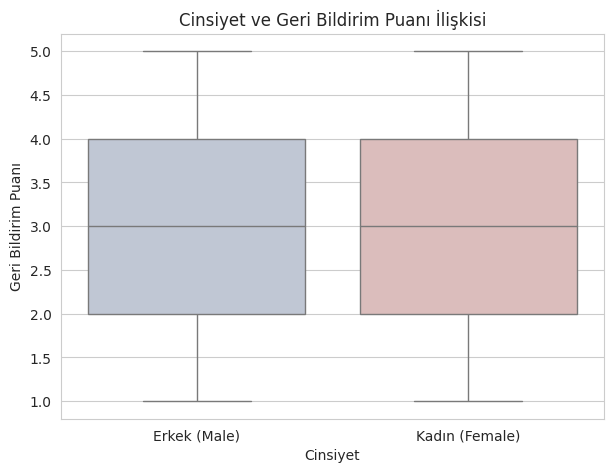

In [27]:
plt.figure(figsize=(7,5))
sns.set_style("whitegrid")
sns.boxplot(x="Gender", y="Feedback_Score", data=c_exp, hue="Gender", palette="vlag")
plt.title("Cinsiyet ve Geri Bildirim Puanı İlişkisi")
plt.xlabel("Cinsiyet")
plt.ylabel("Geri Bildirim Puanı")
plt.show()

Analiz sonucunda erkek ve kadın müşterilerin ortalama aynı memnuniyet düzeyinde geri bildirim verdiği görülmektedir. Buna göre, **cinsiyete bağlı anlamlı bir geri bildirim skoru farkı gözlenmediği** ifade edilebilir.

###**9. Cinsiyet (Gender) ve Memnuniyet Puanı (Satisfaction_Score) İlişkisi**

In [28]:
c_exp.groupby('Gender')['Satisfaction_Score'].agg(['count','mean','median','min','max']).round(2)

,count,mean,median,min,max
Gender,,,,,
Erkek (Male),524,5.47,5.0,1,10
Kadın (Female),476,5.61,6.0,1,10


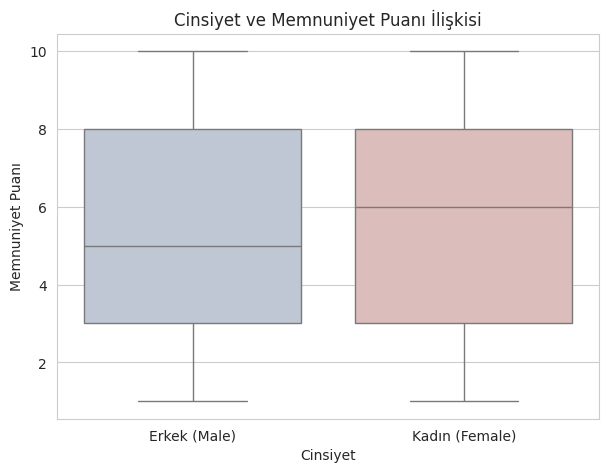

In [29]:
plt.figure(figsize=(7,5))
sns.set_style("whitegrid")
sns.boxplot(x="Gender", y="Satisfaction_Score", data=c_exp, hue="Gender", palette="vlag")
plt.title("Cinsiyet ve Memnuniyet Puanı İlişkisi")
plt.xlabel("Cinsiyet")
plt.ylabel("Memnuniyet Puanı")
plt.show()

Kadın müşterilerin **memnuniyet puanı ortanca değeri** (yaklaşık 6) erkek müşterilerden (yaklaşık 5) **kısmen yüksektir**. Buna göre cinsiyetler arasında **küçük ama görülebilir** bir memnuniyet farkı olduğunu söylenebilir.

###**10. Konum (Location) ve Sitede Geçirilen Süre (Time_Spent_on_Site) İlişkisi**

In [30]:
c_exp.groupby('Location')['Time_Spent_on_Site'].agg(['count','mean','median','min','max']).round(2)

,count,mean,median,min,max
Location,,,,,
Banliyö (Suburban),344,32.45,32.40,5.13,59.91
Kentsel (Urban),344,32.60,32.68,5.11,59.90
Kırsal (Rural),312,31.72,31.68,5.21,59.95


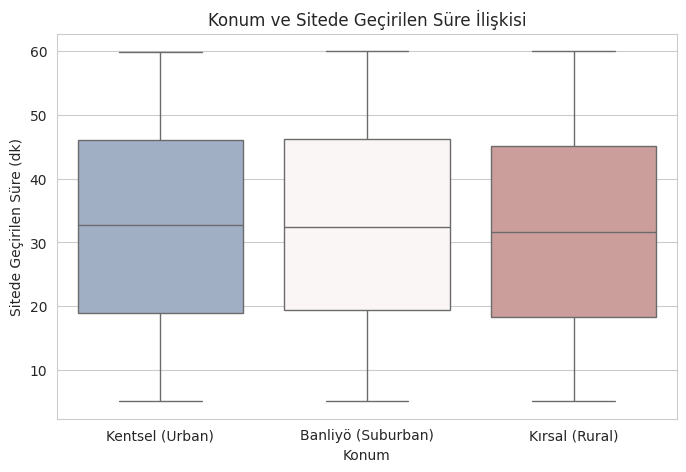

In [31]:
plt.figure(figsize=(8,5))
sns.set_style("whitegrid")
sns.boxplot(x="Location", y="Time_Spent_on_Site", hue="Location", data=c_exp, palette="vlag")
plt.title("Konum ve Sitede Geçirilen Süre İlişkisi")
plt.xlabel("Konum")
plt.ylabel("Sitede Geçirilen Süre (dk)")
plt.show()

Tüm bölgelerde sitede geçirilen ortanca süre neredeyse aynıdır (yaklaşık 32-33 dk). Bu da **konumun**, kullanıcıların ortalama gezinti süresi üzerinde güçlü bir etkisi olmadığını düşündürür. Bu nedenle pazarlama stratejilerinde veya kullanıcı deneyimi optimizasyonunda **konuma göre farklılaştırma yapma gerekliliği düşük** olabilir.

###**11. Konum (Location) ve Satın Alınan Ürün Sayısı (Products_Purchased) İlişkisi**

In [32]:
c_exp.groupby('Location')['Products_Purchased'].agg(['count','mean','median','min','max']).round(2)

,count,mean,median,min,max
Location,,,,,
Banliyö (Suburban),344,10.52,11.0,1,19
Kentsel (Urban),344,10.40,11.0,1,19
Kırsal (Rural),312,10.32,10.0,1,19


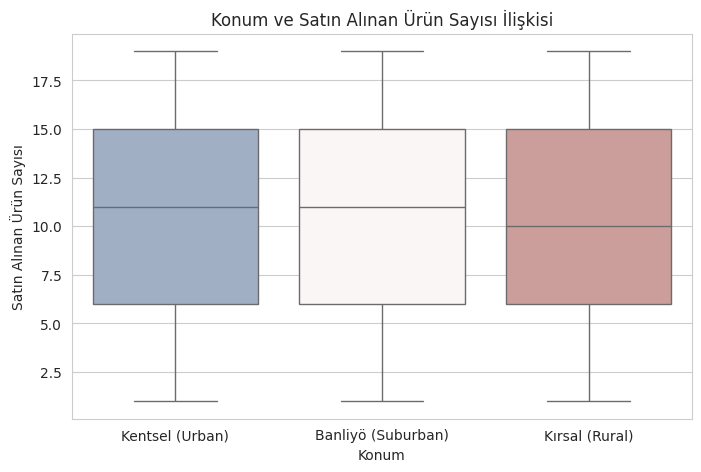

In [33]:
plt.figure(figsize=(8,5))
sns.set_style("whitegrid")
sns.boxplot(x="Location", y="Products_Purchased", hue="Location", data=c_exp, palette="vlag")
plt.title("Konum ve Satın Alınan Ürün Sayısı İlişkisi")
plt.xlabel("Konum")
plt.ylabel("Satın Alınan Ürün Sayısı")
plt.show()

 Müşterilerin yaşadığı **konum**un, satın aldıkları ürün sayısında anlamlı bir fark yaratmadığı görülmektedir.

###**12. Konum (Location) ve Memnuniyet Puanı (Satisfaction_Score) İlişkisi**

In [34]:
c_exp.groupby('Location')['Satisfaction_Score'].agg(['count','mean','median','min','max']).round(2)

,count,mean,median,min,max
Location,,,,,
Banliyö (Suburban),344,5.49,6.0,1,10
Kentsel (Urban),344,5.59,6.0,1,10
Kırsal (Rural),312,5.54,6.0,1,10


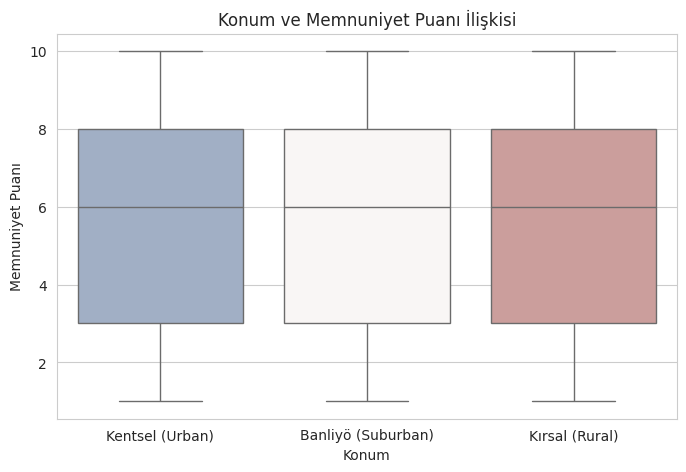

In [35]:
plt.figure(figsize=(8,5))
sns.set_style("whitegrid")
sns.boxplot(x="Location", y="Satisfaction_Score", hue="Location", data=c_exp, palette="vlag")
plt.title("Konum ve Memnuniyet Puanı İlişkisi")
plt.xlabel("Konum")
plt.ylabel("Memnuniyet Puanı")
plt.show()

Tüm bölgelerde memnuniyet puanı ortancası  aynı (6) çıkmıştır. **Konum**un **memnuniyet düzeyini etkilemediği** görülmektedir.
Dolayısıyla müşteri memnuniyetini artırmaya yönelik girişimlerde konuma özel strateji geliştirmek düşük öncelik taşıyabilir.

###**13. Müşteri Durumu (Retention_Status) ve Yaş (Age) İlişkisi**

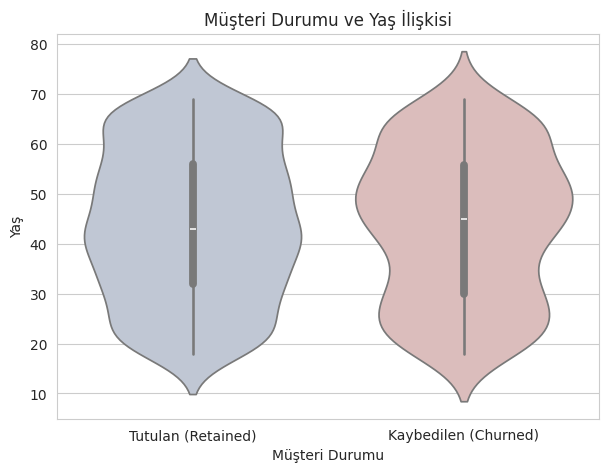

In [36]:
plt.figure(figsize=(7,5))
sns.set_style("whitegrid")
sns.violinplot(x='Retention_Status', y='Age',data=c_exp, hue="Retention_Status", palette='vlag')
plt.title('Müşteri Durumu ve Yaş İlişkisi')
plt.xlabel('Müşteri Durumu')
plt.ylabel('Yaş')
plt.show()

**Tutulan (Retained) müşteri** yaş dağılımı 20–70 arasında geniştir. En yoğun grup 40–55 yaş arasıdır. Medyan yaş yaklaşık 45 görünmektedir **Kaybedilen (Churned) müşteri** dağılımı da yine geniştir. Ancak yoğunluk eğrisi tutulan müşteri grubuna göre daha az baskın olup, medyan yaklaşık 40'tır. Buna göre,  **müşteri durumu ile yaş arasında belirgin bir ilişki görünmemekte, yaş faktörünün müşteri sadakatine doğrudan etkisi sınırlı gibi görünmektedir.**

###**14. Müşteri Durumu (Retention_Status) ve Etkileşim Sayısı (Num_Interactions) İlişkisi**

In [37]:
c_exp.groupby('Retention_Status')['Num_Interactions'].agg(['count','mean','median','min','max']).round(2)

,count,mean,median,min,max
Retention_Status,,,,,
Kaybedilen (Churned),306,7.35,7.0,1,14
Tutulan (Retained),694,7.63,8.0,1,14


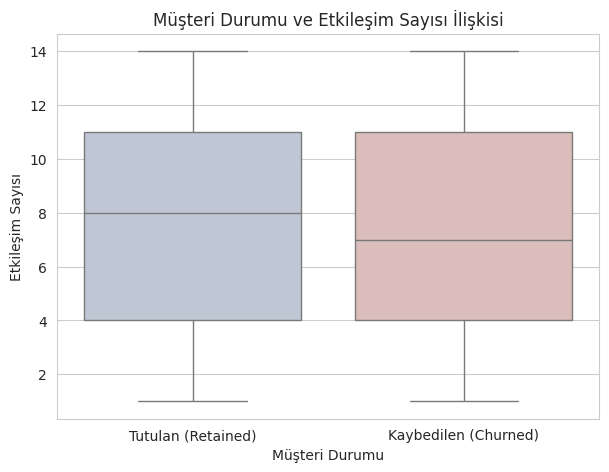

In [38]:
plt.figure(figsize=(7,5))
sns.set_style("whitegrid")
sns.boxplot(x="Retention_Status", y="Num_Interactions", hue="Retention_Status", data=c_exp, palette="vlag")
plt.title("Müşteri Durumu ve Etkileşim Sayısı İlişkisi")
plt.xlabel("Müşteri Durumu")
plt.ylabel("Etkileşim Sayısı")
plt.show()

Tutulan ve kaybedilen müşteri gruplarında benzer etkileşim düzeyleri görülmektedir. Bu nedenle **etkileşim sayısının müşteri tutma durumu ile tek başına ayırt edici bir ilişkisi olmadığı** söylenebilir.

###**15. Müşteri Durumu (Retention_Status) ve Görüntülenen Ürün Sayısı (Products_Viewed) İlişkisi**

In [39]:
c_exp.groupby('Retention_Status')['Products_Viewed'].agg(['count','mean','median','min','max']).round(2)

,count,mean,median,min,max
Retention_Status,,,,,
Kaybedilen (Churned),306,27.80,27.0,5,49
Tutulan (Retained),694,27.18,28.0,5,49


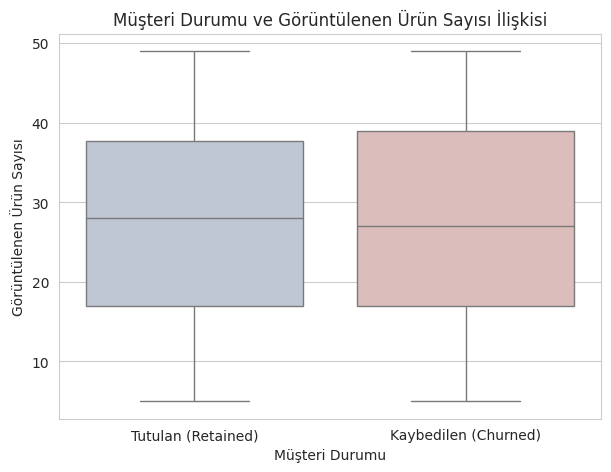

In [40]:
plt.figure(figsize=(7,5))
sns.set_style("whitegrid")
sns.boxplot(x="Retention_Status", y="Products_Viewed", hue="Retention_Status", data=c_exp, palette="vlag")
plt.title("Müşteri Durumu ve Görüntülenen Ürün Sayısı İlişkisi")
plt.xlabel("Müşteri Durumu")
plt.ylabel("Görüntülenen Ürün Sayısı")
plt.show()

Tutulan ve kaybedilen müşterilerin **görüntülediği ürün sayısı** arasında **büyük bir fark gözlenmediği**nden, yalnızca ürün görüntüleme sayısı üzerinden müşteri kaybetme riski tahmini yapmak yanıltıcı olabilir.

###**16. Müşteri Durumu (Retention_Status) ve Satın Alınan Ürün Sayısı (Products_Purchased) İlişkisi**

In [41]:
c_exp.groupby('Retention_Status')['Products_Purchased'].agg(['count','mean','median','min','max']).round(2)

,count,mean,median,min,max
Retention_Status,,,,,
Kaybedilen (Churned),306,10.59,11.0,1,19
Tutulan (Retained),694,10.34,11.0,1,19


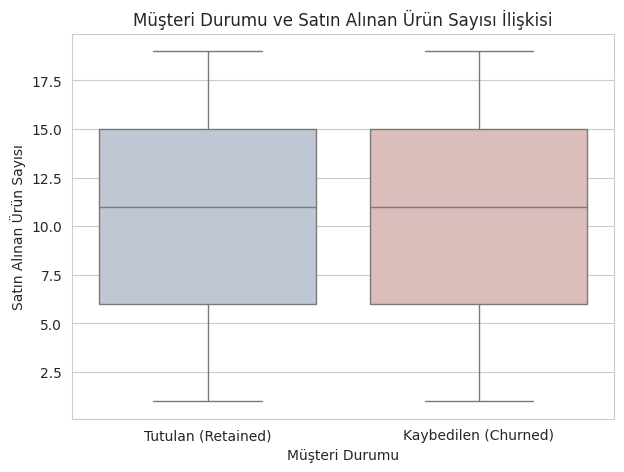

In [42]:
plt.figure(figsize=(7,5))
sns.set_style("whitegrid")
sns.boxplot(x="Retention_Status", y="Products_Purchased", hue="Retention_Status", data=c_exp, palette="vlag")
plt.title("Müşteri Durumu ve Satın Alınan Ürün Sayısı İlişkisi")
plt.xlabel("Müşteri Durumu")
plt.ylabel("Satın Alınan Ürün Sayısı")
plt.show()

Tutulan ve kaybedilen müşterilerin satın aldığı ürün sayısı benzerlik gösterdiğinden, Müşteri sadakati (Retention_Status) ile Satın alınan ürün sayısı (Products_Purchased) arasında **anlamlı bir ilişki gözlenmediği** söylenebilir.

###**17. Müşteri Durumu (Retention_Status) ve Geri Bildirim Puanı (Feedback_Score) İlişkisi**

In [43]:
c_exp.groupby('Retention_Status')['Feedback_Score'].agg(['count','mean','median','min','max']).round(2)

,count,mean,median,min,max
Retention_Status,,,,,
Kaybedilen (Churned),306,2.88,3.0,1,5
Tutulan (Retained),694,3.03,3.0,1,5


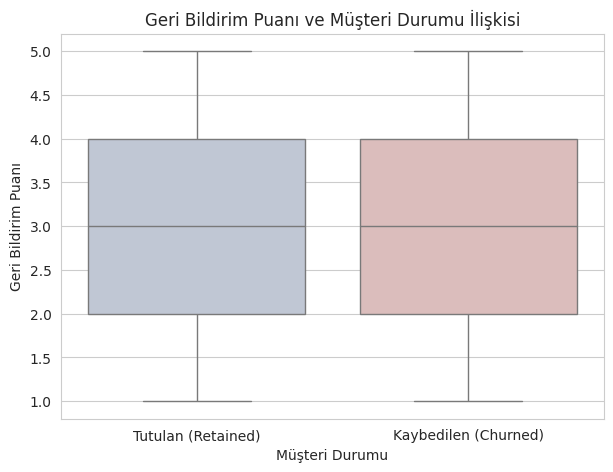

In [44]:
plt.figure(figsize=(7,5))
sns.boxplot(x="Retention_Status", y="Feedback_Score", hue="Retention_Status", data=c_exp, palette="vlag")
plt.title("Geri Bildirim Puanı ve Müşteri Durumu İlişkisi")
plt.xlabel("Müşteri Durumu")
plt.ylabel("Geri Bildirim Puanı")
plt.show()

Kaybedilen müşterilerde ortalama geri bildirim puanı **2.88** iken, tutulan müşterilerde **3.03**'tür. Buna göre, çok büyük bir fark olmamakla birlikte, yüksek geri bildirim puanları ile müşteri kazanımı arasında pozitif bir ilişki olduğu söylenebilir.

###**18. Müşteri Durumu (Retention_Status) ve Memnuniyet Puanı (Satisfaction_Score) İlişkisi**

In [45]:
c_exp.groupby('Retention_Status')['Satisfaction_Score'].agg(['count','mean','median','min','max']).round(2)

,count,mean,median,min,max
Retention_Status,,,,,
Kaybedilen (Churned),306,5.4,5.0,1,10
Tutulan (Retained),694,5.6,6.0,1,10


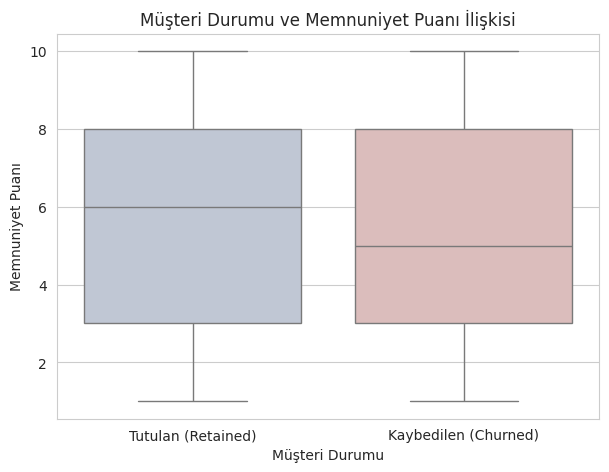

In [46]:
plt.figure(figsize=(7,5))
sns.set_style("whitegrid")
sns.boxplot(x="Retention_Status", y="Satisfaction_Score", hue="Retention_Status", data=c_exp, palette="vlag")
plt.title("Müşteri Durumu ve Memnuniyet Puanı İlişkisi")
plt.xlabel("Müşteri Durumu")
plt.ylabel("Memnuniyet Puanı")
plt.show()

**Memnuniyet puanı ile müşteri sadakati arasında pozitif bir ilişki** gözlemlenmektedir. Daha yüksek memnuniyet puanlarına sahip müşterilerin daha fazla elde tutulduğu, böylelikle memnuniyetin müşteri kaybını önlemede **kritik bir rol** oynadığı söylenebilir.

##**Sayısal Değişkenlerin Birbiriyle İlişkisi**

Sayısal değişkenlerin birbirleriyle ilişkilerini en anlamlı şekilde incelemek amacıyla çoğunlukla **"regplot"** ve **"boxplot"** grafik türleri seçilmiştir.

Regplot yerine **"scatterplot"** da kullanılabilecek olup, regresyon eğrisiyle eğilimlerin daha kolay görselleştirilebileceği düşüncesiyle regplot tercih edilmiştir.

###**19. Yaş (Age) ve Etkileşim Sayısı (Num_Interactions) İlişkisi**

Öncelikle yaş yoğunluğuna ve dağılımına göz atalım:

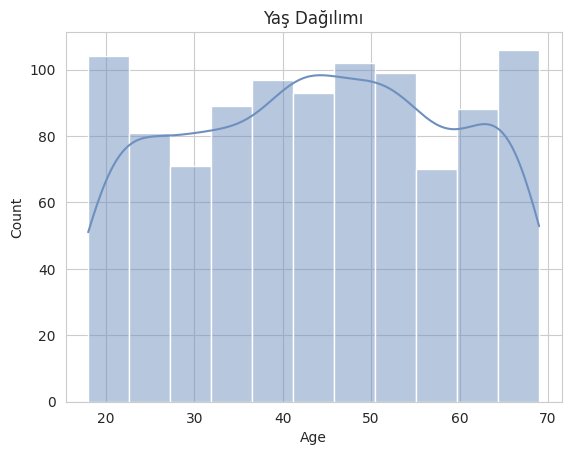

In [47]:
sns.histplot(c_exp['Age'], color="#6e90bf", kde=True).set_title('Yaş Dağılımı')
plt.show()

Histogram grafiğindeji her sütun belirli bir **yaş aralığındaki müşteri sayısını (frekansı)** göstermektedir. Y ekseni **“Kişi Sayısı (Count)”** değeridir. **Mavi Eğri (KDE)** ise yaş dağılımının sürekli yoğunluk fonksiyonunu çizerek tepe noktaları ve verinin en yoğun olduğu yaş aralıklarını göstermektedir.

  - Yaş eğrisi 45 yaş civarında en yüksek noktadadır. Buna göre, müşteri tabanının en yoğun olduğu yaş grubu bu yaşlardır.  
  - Yaşlar 18’den 70’e kadar geniş bir aralıkta dağılmış olup uçlarda (20’li ve 60’lı yaşlar) önemli sayıda sayıda müşteri bulunduğu grülmektedir.
  -Yalnızca yaş dağılımı göz önüne alınarak, pazarlama stratejisi planlanırken **40–55 yaş arası** kitleye özel kampanyalara önceilik verilebilir fakat genç ve ileri yaştaki müşteriler de göz ardı edilmemelidir.

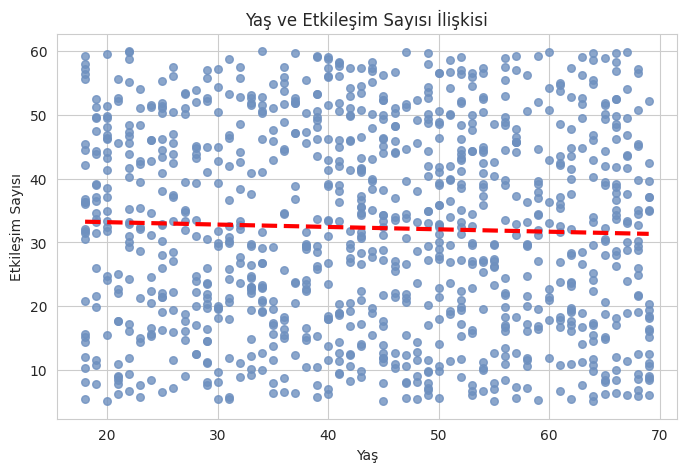

In [48]:
plt.figure(figsize=(8,5))
sns.set_style("whitegrid")
sns.regplot(x='Age', y='Time_Spent_on_Site', data=c_exp, ci=None, scatter_kws={
    's':30, 'color':'#6e90bf'},line_kws={'color':'red', 'linewidth':3, 'linestyle':'--'})
plt.title('Yaş ve Etkileşim Sayısı İlişkisi')
plt.xlabel('Yaş')
plt.ylabel('Etkileşim Sayısı')
plt.show()

Yaş arttıkça etkileşim sayısında çok hafif bir **azalma eğilimi** görülmektedir. Ancak bu düşüş oldukça zayıf bir eğimle ifade edilmiştir (noktalar neredeyse yatayda yayılmıştır). Buna göre yaş tek başına etkileşim sayısını anlamlı düzeyde belirleyen bir faktör değildir. Segmentasyon ya da hedefleme için yaşın başka değişkenlerle birlikte değerlendirilmesi anlamlıdır.

###**20. Yaş (Age) ve Sitede Geçirilen Süre (Time_Spent_on_Site) İlişkisi**

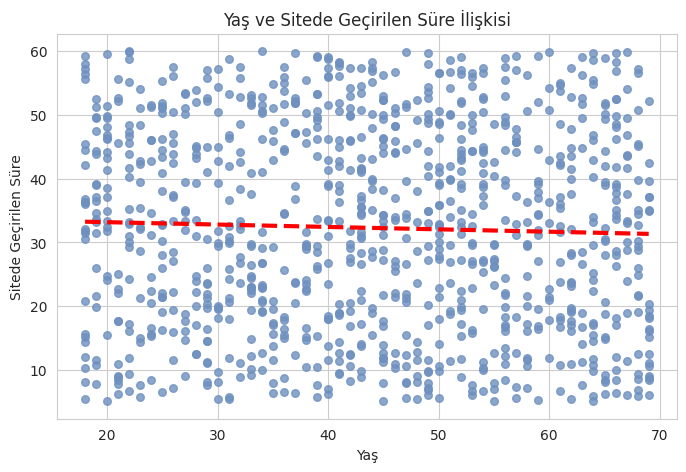

In [49]:
plt.figure(figsize=(8,5))
sns.set_style("whitegrid")
sns.regplot(x="Age", y="Time_Spent_on_Site", data=c_exp, ci=None, scatter_kws={
    's':30, 'color':'#6e90bf'},line_kws={'color':'red', 'linewidth':3, 'linestyle':'--'})
plt.title("Yaş ve Sitede Geçirilen Süre İlişkisi")
plt.xlabel("Yaş")
plt.ylabel("Sitede Geçirilen Süre")
plt.show()

Yaş arttıkça sitede geçirilen sürede çok hafif bir azalma eğilimi görülmekle birlikte, tüm yaş aralıklarında geniş bir dağılım mevcuttur. Yani bazı genç kullanıcılar sitede çok az süre geçirirken bazı yaşlı kullanıcıların fazla zaman harcayabildiği gözlemlenmiştir. Bu nedenle, yaş ile sitede geçirilen süre arasında **anlamlı ve güçlü bir ilişki olmadığı** ifade edilebilir.

###**21. Yaş (Age) ve Görüntülenen Ürün Sayısı (Products_Viewed) İlişkisi**

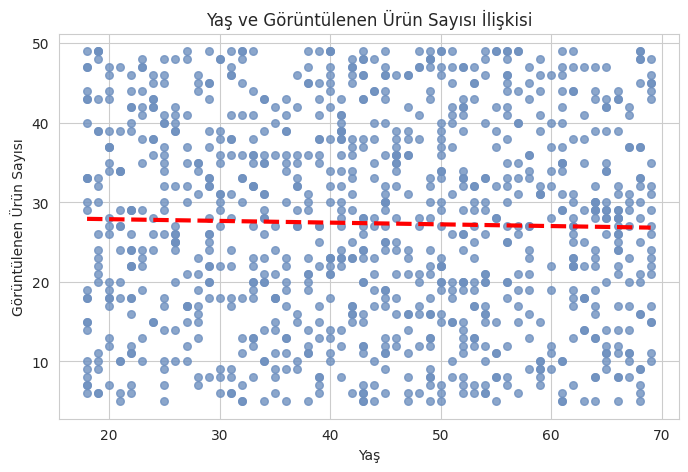

In [50]:
plt.figure(figsize=(8,5))
sns.set_style("whitegrid")
sns.regplot(x="Age", y="Products_Viewed", data=c_exp, ci=None, scatter_kws={
    's':30, 'color':'#6e90bf'}, line_kws={'color':'red', 'linewidth':3, 'linestyle':'--'})
plt.title("Yaş ve Görüntülenen Ürün Sayısı İlişkisi")
plt.xlabel("Yaş")
plt.ylabel("Görüntülenen Ürün Sayısı")
plt.show()

Yaş grupları arasında görüntülenen ürün sayısının ortanca değerinde belirgin fark yoktur, yani yaş ile görüntülenen ürün sayısı arasında **güçlü bir ilişki bulunmamaktadır**.

###**22. Yaş (Age) ve Satın Alınan Ürün Sayısı (Products_Purchased) İlişkisi**

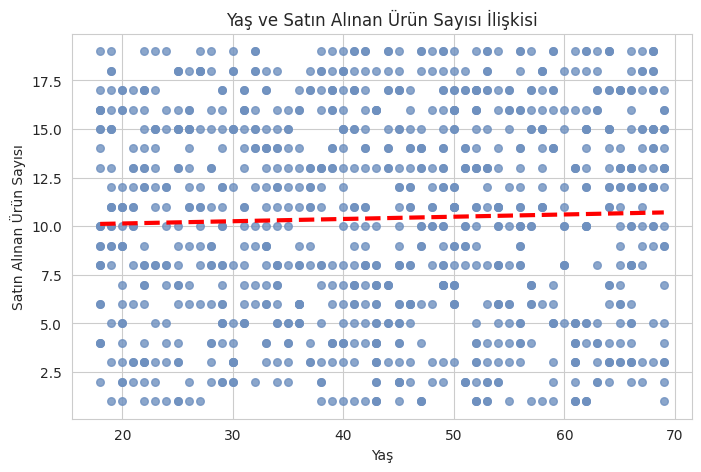

In [51]:
plt.figure(figsize=(8,5))
sns.set_style("whitegrid")
sns.regplot(x='Age', y='Products_Purchased', data=c_exp, ci=None, scatter_kws={
    's':30, 'color':'#6e90bf'},line_kws={'color':'red', 'linewidth':3, 'linestyle':'--'})
plt.title('Yaş ve Satın Alınan Ürün Sayısı İlişkisi')
plt.xlabel('Yaş')
plt.ylabel('Satın Alınan Ürün Sayısı')
plt.show()

Yaş ile satın alınan ürün sayısı arasında **zayıf pozitif** ama neredeyse **yok denecek kadar düşük** bir ilişki vardır. Regresyon çizgisi hafif yukarı eğimli olsa da, bu eğim istatistiksel olarak anlamlı olmayabilir. Yani yaş, müşterinin kaç ürün satın alacağına dair güçlü bir belirleyici değildir. Bu nedenle, pazarlama veya kampanya stratejilerinde yaşa göre farklılık gözetmek **tek başına yeterli olmayabilir**.

###**23. Yaş (Age) ve Geri Bildirim Puanı (Feedback_Score) İlişkisi**

In [52]:
c_exp.groupby("Feedback_Score")["Age"].agg(["count", "mean", "median", "min", "max"]).round(2)

,count,mean,median,min,max
Feedback_Score,,,,,
1,211,43.94,45.0,18,69
2,183,45.81,46.0,18,69
3,212,43.20,43.0,18,69
4,198,43.84,42.0,18,69
5,196,42.47,43.0,18,69


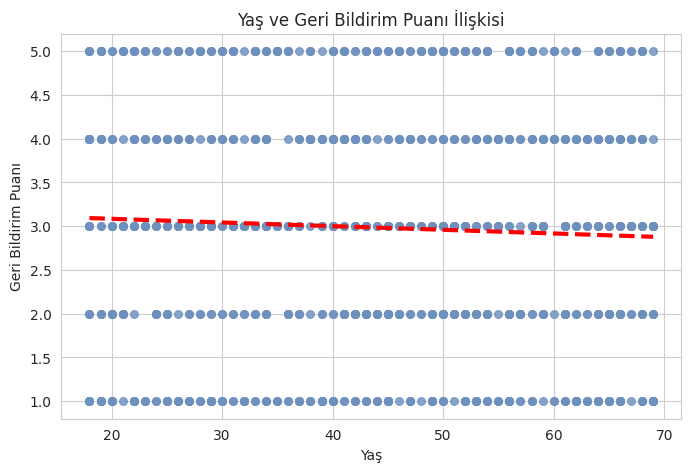

In [53]:
plt.figure(figsize=(8,5))
sns.set_style("whitegrid")
sns.regplot(x="Age", y="Feedback_Score", data=c_exp, ci=None, scatter_kws={
    's':30, 'color':'#6e90bf'}, line_kws={'color':'red', 'linewidth':3, 'linestyle':'--'})
plt.title("Yaş ve Geri Bildirim Puanı İlişkisi")
plt.xlabel("Yaş")
plt.ylabel("Geri Bildirim Puanı")
plt.show()

Regresyon eğrisi hafif aşağı eğimli, bu da yaş arttıkça geri bildirim skorunda **çok zayıf bir azalma eğilimi** olduğunu ifade etmektedir. Bu değişkenler arasında **anlamlı ve güçlü bir doğrusal ilişki yoktur**.

###**24. Yaş (Age) ve Memnuniyet Puanı (Satisfaction_Score) İlişkisi**

In [54]:
c_exp["AgeBin"] = pd.cut(c_exp["Age"], bins=[18, 30, 40, 50, 60, 70],
                         labels=["18–29", "30–39", "40–49", "50–59", "60–69"],
                         include_lowest=True, right=False)

c_exp.groupby("AgeBin", observed=True)["Satisfaction_Score"].agg(["count", "mean", "median", "min", "max"]).round(2)

,count,mean,median,min,max
AgeBin,,,,,
18–29,222,5.45,6.0,1,10
30–39,174,5.76,6.0,1,10
40–49,214,5.21,5.0,1,10
50–59,196,5.64,6.0,1,10
60–69,194,5.72,6.0,1,10


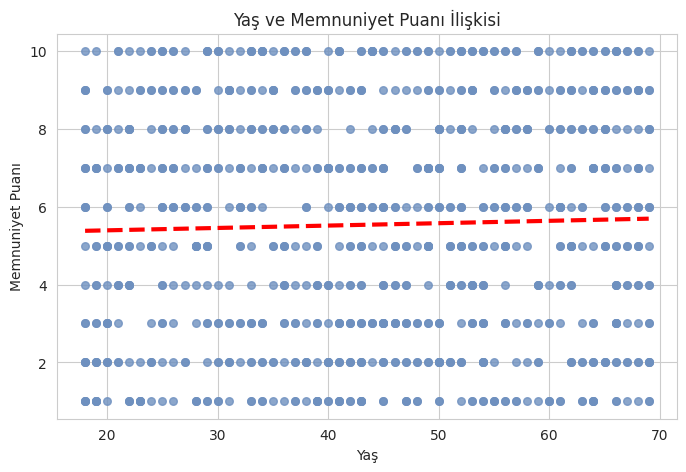

In [55]:
plt.figure(figsize=(8,5))
sns.set_style("whitegrid")
sns.regplot( x="Age", y="Satisfaction_Score", data=c_exp, ci=None, scatter_kws={
    's':30, 'color':'#6e90bf'},line_kws={'color':'red', 'linewidth':3, 'linestyle':'--'})
plt.title("Yaş ve Memnuniyet Puanı İlişkisi")
plt.xlabel("Yaş")
plt.ylabel("Memnuniyet Puanı")
plt.show()

Memnuniyet puanları çoğunlukla **6** civarında yoğunlaşmıştır; yaş arttıkça bu ortanca değer belirgin biçimde değişmemektedir. Regresyon çizgisi **çok hafif yukarı eğimlidir**, bu da yaş büyüdükçe memnuniyet puanında çok zayıf bir artış eğilimine işaret etmektedir ancak eğim neredeyse yatay olduğundan ilişki gücü zayıftır. Bu nedenle yaş ile memnuniyet puanı arasında **belirgin ve güçlü bir ilişki bulunmamaktadır** denilebilir.

###**25. Etkileşim Sayısı (Num_Interactions) ve Sitede Geçirilen Süre (Time_Spent_on_Site) İlişkisi**

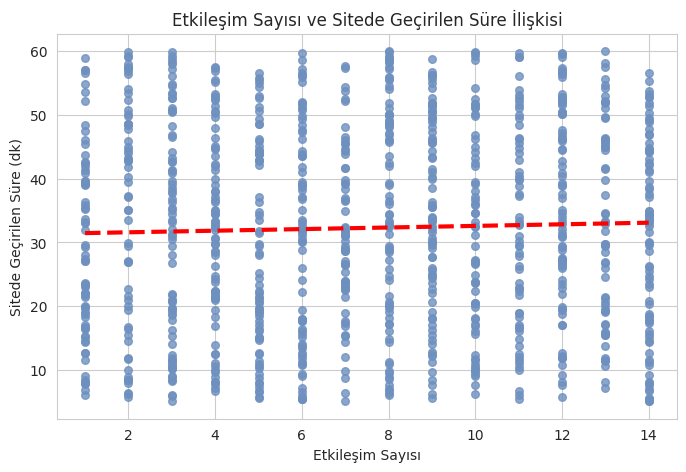

In [56]:
plt.figure(figsize=(8,5))
sns.set_style("whitegrid")
sns.regplot( x="Num_Interactions", y="Time_Spent_on_Site", data=c_exp, ci=None, scatter_kws={
    's':30, 'color':'#6e90bf'},line_kws={'color':'red', 'linewidth':3, 'linestyle':'--'})
plt.title("Etkileşim Sayısı ve Sitede Geçirilen Süre İlişkisi")
plt.xlabel("Etkileşim Sayısı")
plt.ylabel("Sitede Geçirilen Süre (dk)")
plt.show()

Etkileşim sayısı ile sitede geçirilen süre arasında çok güçlü bir doğrusal ilişki görünmemektedir. Bu iki değişkenin başka değişkenlerle birlikte incelenmesi daha anlamlı sonuçlar verebilir.

###**26. Etkileşim Sayısı (Num_Interactions) ve Görüntülenen Ürün Sayısı (Products_Viewed) İlişkisi**

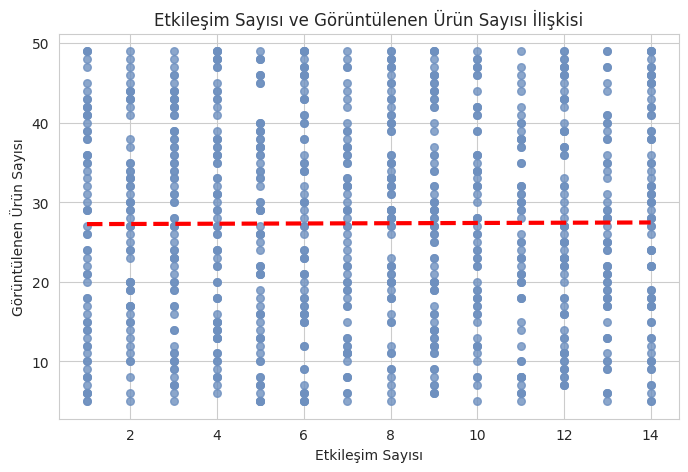

In [57]:
plt.figure(figsize=(8,5))
sns.set_style("whitegrid")
sns.regplot(x="Num_Interactions", y="Products_Viewed", data=c_exp, ci=None, scatter_kws={
    's':30, 'color':'#6e90bf'},line_kws={'color':'red', 'linewidth':3, 'linestyle':'--'})
plt.title("Etkileşim Sayısı ve Görüntülenen Ürün Sayısı İlişkisi")
plt.xlabel("Etkileşim Sayısı")
plt.ylabel("Görüntülenen Ürün Sayısı")
plt.show()

Etkileşim sayısının artması görüntülenen ürün sayısında çok anlamlı bir değişime yol açmamaktadır.

###**27. Etkileşim Sayısı (Num_Interactions) ve Satın Alınan Ürün Sayısı (Products_Purchased) İlişkisi**

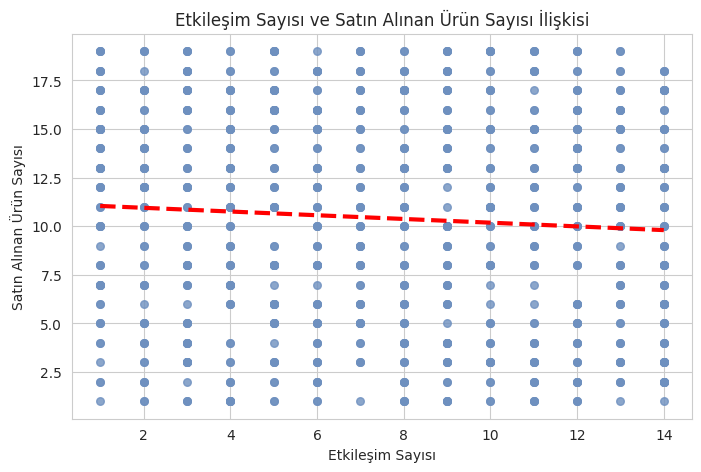

In [58]:
plt.figure(figsize=(8,5))
sns.set_style("whitegrid")
sns.regplot(x='Num_Interactions', y='Products_Purchased', data=c_exp, ci=None, scatter_kws={
    's':30, 'color':'#6e90bf'},line_kws={'color':'red', 'linewidth':3, 'linestyle':'--'})
plt.title('Etkileşim Sayısı ve Satın Alınan Ürün Sayısı İlişkisi')
plt.xlabel('Etkileşim Sayısı')
plt.ylabel('Satın Alınan Ürün Sayısı')
plt.show()

Satın alınan ürün sayısı genel olarak yaklaşık **10–11** civarında yoğunlaşmıştır. Regresyon çizgisi **negatif eğimli** olup, etkileşim sayısı arttıkça satın alınan ürün sayısının **çok hafif azalma eğilimi** gösterdiğini göstermektedir. Ancak etkileşim sayısındaki artış **doğrudan** satın alım sayısını artırmamaktadır. Hatta hafif negatif eğilim, bazı durumlarda fazla etkileşimin bile satın alım davranışına katkı sağlamadığını gösterebilir. Buna göre kullanıcıların etkileşimlerinin sayısından çok niteliğinin daha önemli olduğu düşünülebilir.

###**28. Etkileşim Sayısı (Num_Interactions) ve Geri Bildirim Puanı (Feecback_Score) İlişkisi**

In [59]:
c_exp.groupby("Feedback_Score")["Num_Interactions"].agg(["count", "mean", "median", "min", "max"]).round(2)

,count,mean,median,min,max
Feedback_Score,,,,,
1,211,7.50,7.0,1,14
2,183,8.05,8.0,1,14
3,212,7.09,7.0,1,14
4,198,7.36,8.0,1,14
5,196,7.80,8.0,1,14


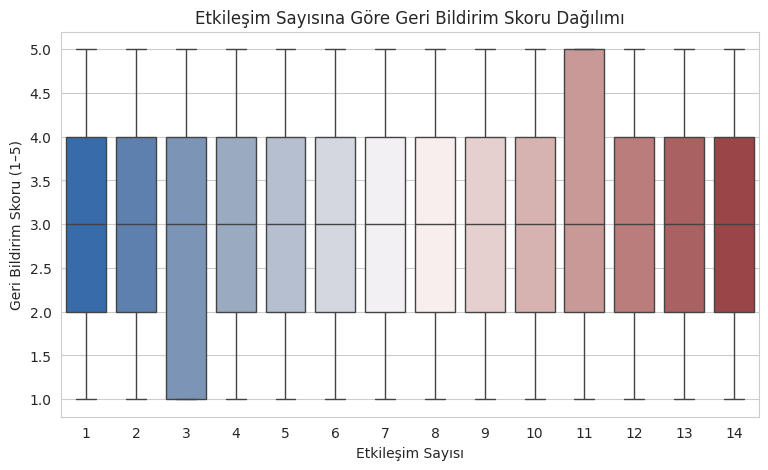

In [60]:
plt.figure(figsize=(9,5))
sns.boxplot(x="Num_Interactions", y="Feedback_Score", hue="Num_Interactions", legend=False, data=c_exp, palette="vlag")
plt.title("Etkileşim Sayısına Göre Geri Bildirim Skoru Dağılımı")
plt.xlabel("Etkileşim Sayısı")
plt.ylabel("Geri Bildirim Skoru (1–5)")
plt.show()

Her etkileşim sayısı grubunda ortanca puan genellikle **3** civarındadır. (Sadece 11 etkileşimli grupta medyan 4'e kadar çıkmaktadır). Etkileşim sayısı arttıkça puan aralığı genellikle sabit kalmakta, bu da tüm etkileşim gruplarında 1 ile 5 arasında puanların verildiğini göstermektedir. Buna göre etkileşim sayısı ile geri bildirim skoru arasında **güçlü bir ilişki görünmemektedir**.

###**29. Etkileşim Sayısı (Num_Interactions) ve Memnuniyet Puanı (Satisfaction_Score) İlişkisi**

In [61]:
c_exp.groupby("Satisfaction_Score")["Num_Interactions"].agg(["mean", "median", "min", "max"]).round(2)

,mean,median,min,max
Satisfaction_Score,,,,
1,7.49,8.0,1,14
2,7.37,8.0,1,14
3,7.33,7.0,1,14
4,7.27,7.0,1,14
5,7.53,7.0,1,14
6,7.29,6.0,1,14
7,7.61,8.0,1,14
8,7.35,7.0,1,14
9,8.32,8.0,1,14


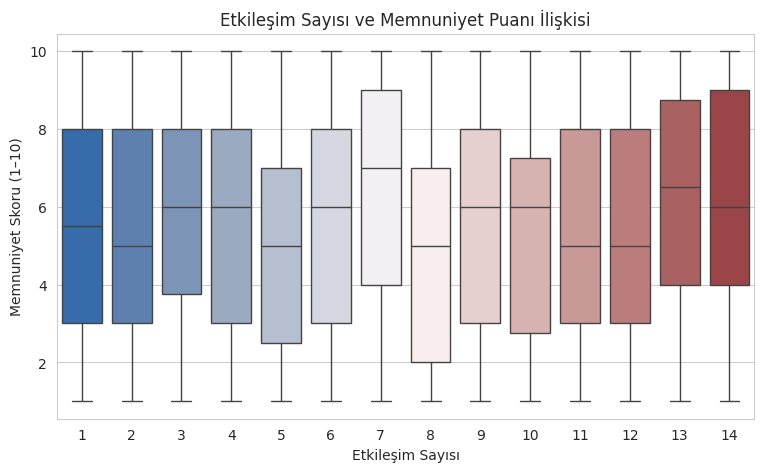

In [62]:
plt.figure(figsize=(9,5))
sns.set_style("whitegrid")
sns.boxplot(x="Num_Interactions", y="Satisfaction_Score", hue="Num_Interactions", legend=False, data=c_exp,palette="vlag")
plt.title("Etkileşim Sayısı ve Memnuniyet Puanı İlişkisi")
plt.xlabel("Etkileşim Sayısı")
plt.ylabel("Memnuniyet Skoru (1–10)")
plt.show()

Düşük etkileşim sayılarında memnuniyet puanı ortancası genellikle **5–6 civarında**yken yüksek etkileşim seviyelerinde **6–7 aralığına yükseldiği** görülmektedir. Yine aynı şekilde, etkileşim sayısı arttıkça **memnuniyet puanlarının üst sınırlara doğru kaydığı** da gözlenmektedir Buna göre **daha fazla etkileşim içinde olan müşterilerin**, daha yüksek memnuniyet puanı vermek potansiyeline sahip olduğu ifade edilebilir. Buradan yola çıkarak, **müşteri memnuniyetini yükseltme** hedefine erişmek amacıyla müşteri  etkileşimini artıracak yolların araştırılması anlamlı olabilir.

###**30. Sitede Geçirilen Süre (Time_Spent_on_Site) ve Görüntülenen Ürün Sayısı (Products_Viewed) İlişkisi**

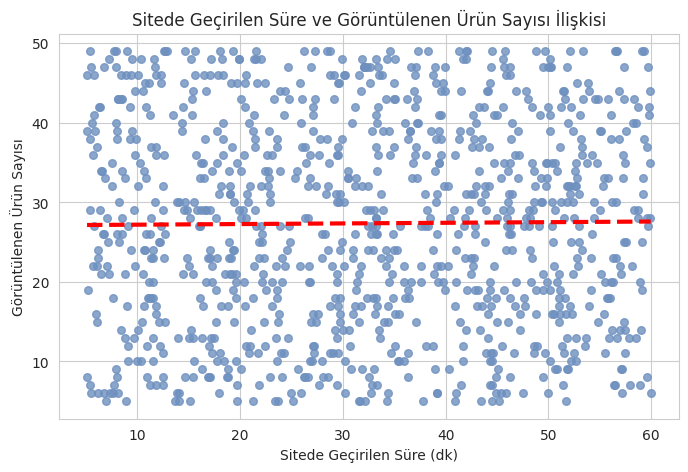

In [63]:
plt.figure(figsize=(8,5))
sns.set_style("whitegrid")
sns.regplot(x="Time_Spent_on_Site", y="Products_Viewed", data=c_exp, ci=None, scatter_kws={
    's':30, 'color':'#6e90bf'},line_kws={'color':'red', 'linewidth':3, 'linestyle':'--'})
plt.title("Sitede Geçirilen Süre ve Görüntülenen Ürün Sayısı İlişkisi")
plt.xlabel("Sitede Geçirilen Süre (dk)")
plt.ylabel("Görüntülenen Ürün Sayısı")
plt.show()

Görüntülenen ürün sayısının ortancası genel olarak 27-28 civarındadır. Regresyon çizgisi, ürün görüntüleme ortalamasının sitede geçirilen süre arttıkça **çok hafif** şekilde yükseldiğini göstermektedir. Buna göre **sitede geçirilen sürenin artışıyla görüntülenen ürün sayısı arasında zayıf ve pozitif bir ilişki** vardır denilebilir. Ancak bu çok güçlü bir ilişki değildir; yani kullanıcıların ürün görüntüleme davranışları sadece sitede kalma süresiyle açıklanamaz.

###**31. Sitede Geçirilen Süre (Time_Spent_on_Site) ve Satın Alınan Ürün Sayısı (Products_Purchased) İlişkisi**

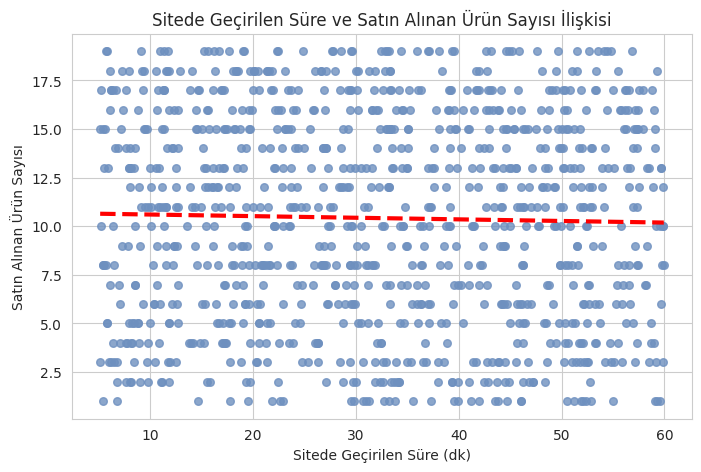

In [64]:
plt.figure(figsize=(8,5))
sns.set_style("whitegrid")
sns.regplot(x="Time_Spent_on_Site", y="Products_Purchased", data=c_exp, ci=None, scatter_kws={
    's':30, 'color':'#6e90bf'},line_kws={'color':'red', 'linewidth':3, 'linestyle':'--'})
plt.title("Sitede Geçirilen Süre ve Satın Alınan Ürün Sayısı İlişkisi")
plt.xlabel("Sitede Geçirilen Süre (dk)")
plt.ylabel("Satın Alınan Ürün Sayısı")
plt.show()

Veri dağılımının oldukça yaygın olduğu görülmektedir. Her süre aralığında satın alınan ürün sayısının ortancası yaklaşık 10 civarındadır. Regresyon çizgisinin neredeyse yatay olması da sitede geçirilen sürenin satın alınan ürün sayısı üzerinde **anlamlı bir etkisi olmadığını** göstermektedir.

###**32. Görüntülenen Ürün Sayısı (Products_Viewed) ve Satın Alınan Ürün Sayısı (Products_Purchased) İlişkisi**

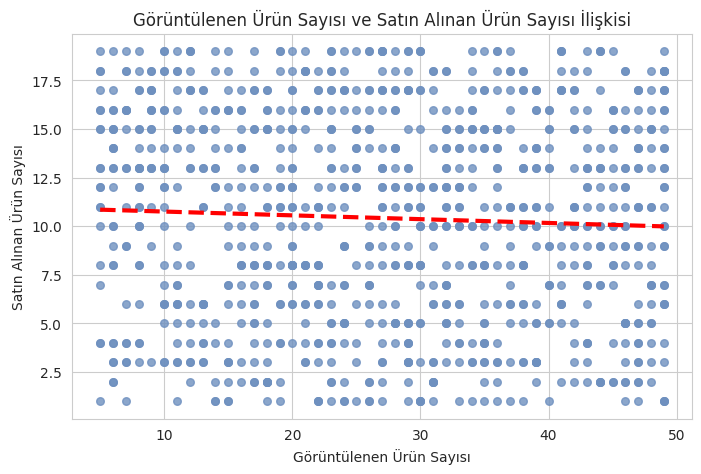

In [65]:
plt.figure(figsize=(8,5))
sns.set_style("whitegrid")
sns.regplot(x="Products_Viewed", y="Products_Purchased", data=c_exp, ci=None,scatter_kws={
    's':30, 'color':'#6e90bf'},line_kws={'color':'red', 'linewidth':3, 'linestyle':'--'})
plt.title("Görüntülenen Ürün Sayısı ve Satın Alınan Ürün Sayısı İlişkisi")
plt.xlabel("Görüntülenen Ürün Sayısı")
plt.ylabel("Satın Alınan Ürün Sayısı")
plt.show()

Verinin dağılımı yaygın ve her görüntüleme aralığında farklı sayıda satın alma gerçekleştiği görülmektedir. Regresyon çizgisi de **çok hafif negatif eğimli** ve neredeyse yataydır. Bu da görüntülenen ürün sayısındaki artışın, satın alınan ürün sayısında **belirgin bir değişiklik yaratmadığını** göstermektedir. Buna göre müşteriyi çok sayıda ürüne maruz bırakmak tek başına satın almayı arttırmak için yeterli görünmemektedir.

###**33. Geri Bildirim Puanı (Feedback_Score) ve Memnuniyet Puanı (Satisfaction_Score) İlişkisi**

In [66]:
c_exp.groupby("Feedback_Score")["Satisfaction_Score"].agg(["mean", "median", "min", "max"]).round(2)

,mean,median,min,max
Feedback_Score,,,,
1,5.53,6.0,1,10
2,6.00,6.0,1,10
3,5.55,6.0,1,10
4,5.22,5.0,1,10
5,5.43,6.0,1,10


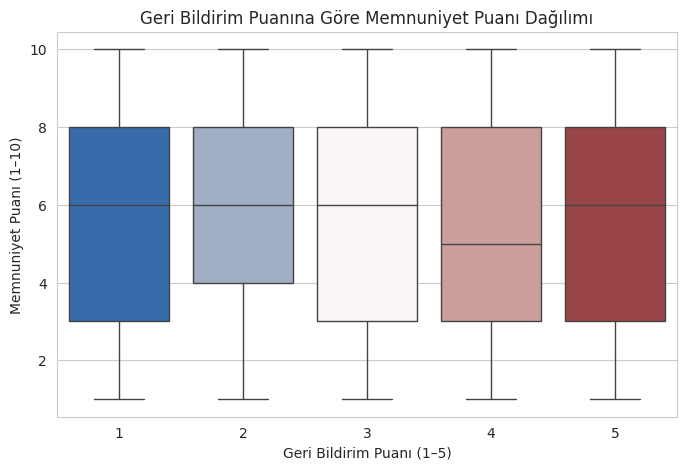

In [67]:
plt.figure(figsize=(8,5))
sns.set_style("whitegrid")
sns.boxplot(x="Feedback_Score", y="Satisfaction_Score", hue="Feedback_Score", legend=False, data=c_exp, palette="vlag")
plt.title("Geri Bildirim Puanına Göre Memnuniyet Puanı Dağılımı")
plt.xlabel("Geri Bildirim Puanı (1–5)")
plt.ylabel("Memnuniyet Puanı (1–10)")
plt.show()

Tüm geri bildirim puanı gruplarında memnuniyet puanı dağılımı oldukça geniş bir aralıktadır. Buna göre, geri bildirim puanı ile memnuniyet puanı arasında güçlü bir ilişki gözlenmemektedir.

###**34. Satın Alınan Ürün Sayısı (Products_Purchased) ve Geri Bildirim Puanı (Feedback_Score) İlişkisi**

In [68]:
c_exp.groupby("Feedback_Score")["Products_Purchased"].agg(["count", "mean", "median", "min", "max"]).round(2)

,count,mean,median,min,max
Feedback_Score,,,,,
1,211,10.44,11.0,1,19
2,183,10.49,11.0,1,19
3,212,10.56,11.0,1,19
4,198,10.20,11.0,1,19
5,196,10.39,11.0,1,19


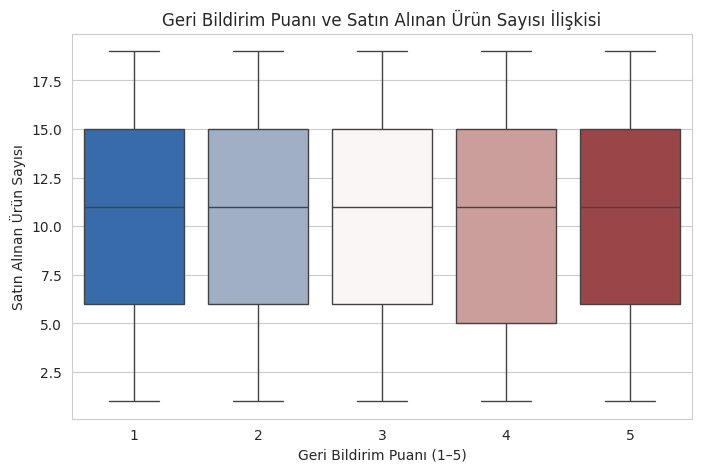

In [69]:
plt.figure(figsize=(8,5))
sns.set_style("whitegrid")
sns.boxplot(x="Feedback_Score", y="Products_Purchased", hue="Feedback_Score", legend=False,data=c_exp, palette="vlag")
plt.title("Geri Bildirim Puanı ve Satın Alınan Ürün Sayısı İlişkisi")
plt.xlabel("Geri Bildirim Puanı (1–5)")
plt.ylabel("Satın Alınan Ürün Sayısı")
plt.show()

Tüm geri bildirim puanlarında satın alınan ürün sayısının ortanca değeri yaklaşık **11** civarındadır ve her puan düzeyinde **geniş bir satın alınan ürün sayısı dağılımı** görülmektedir. Bu nedenle geri bildirim puamı ile satın alınan ürün sayısı arasında **anlamlı bir ilişki** gözlenmemektedir.

###**35. Satın Alınan Ürün Sayısı (Products_Purchased) ve Memnuniyet Puanı (Satisfaction_Score) İlişkisi**

In [70]:
c_exp.groupby("Satisfaction_Score")["Products_Purchased"].agg(["count", "mean", "median", "min", "max"]).round(2)

,count,mean,median,min,max
Satisfaction_Score,,,,,
1,96,10.55,11.5,1,19
2,115,10.76,11.0,1,19
3,99,10.63,11.0,1,19
4,79,10.16,11.0,1,19
5,97,10.21,10.0,1,19
6,96,10.52,11.0,1,19
7,115,9.89,9.0,1,19
8,98,10.55,11.0,1,19
9,99,10.60,11.0,1,19


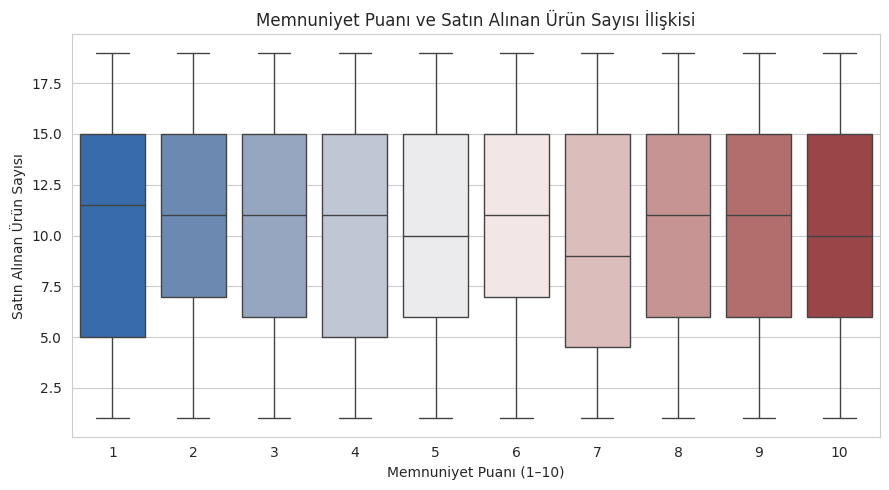

In [71]:
plt.figure(figsize=(9,5))
sns.set_style("whitegrid")
sns.boxplot(x="Satisfaction_Score", y="Products_Purchased", data=c_exp,hue="Satisfaction_Score",legend=False,palette="vlag")
plt.title("Memnuniyet Puanı ve Satın Alınan Ürün Sayısı İlişkisi")
plt.xlabel("Memnuniyet Puanı (1–10)")
plt.ylabel("Satın Alınan Ürün Sayısı")
plt.tight_layout()
plt.show()

Tüm memnuniyet seviyelerinde satın alınan ürün sayısının dağılımının **geniş ve benzer** olduğu, yani satın alma davranışı ile memnuniyet puanı arasında **doğrusal veya güçlü bir ilişki olmadığı** gözlenmektedir. Bu durum, memnuniyet puanının tek başına satın alma davranışını açıklamakta **yetersiz** olduğu şeklinde yorumlanabilir.

##**Çoklu Değişkenlerin Birbiriyle İlişkisi**

Hem kategorik hem de sayısal değişkenlerin çoklu olarak ilişkilerini incelerken verinin yapısı ve dağılımına uygun olarak **"boxplot", "barplot", "catplot", "scatterplot", "lineplot", "lmplot"** ve **"heatmap"** gibi farklı grafik türleri kullanılmıştır.

###**36. Cinsiyet (Gender), Konum (Location) ve Satın Alınan Ürün Sayısı (Products_Purchased) İlişkisi**

In [72]:
c_exp.groupby(["Location", "Gender"])["Products_Purchased"].agg(["count", "mean", "median", "min", "max"]).round(2)

count   mean  median  min  max
Location           Gender                                        
Banliyö (Suburban) Erkek (Male)      176  10.45    11.0    1   19
                   Kadın (Female)    168  10.60    11.0    1   19
Kentsel (Urban)    Erkek (Male)      177  10.27    11.0    1   19
                   Kadın (Female)    167  10.53    10.0    1   19
Kırsal (Rural)     Erkek (Male)      171  10.06    10.0    1   19
                   Kadın (Female)    141  10.65    11.0    1   19

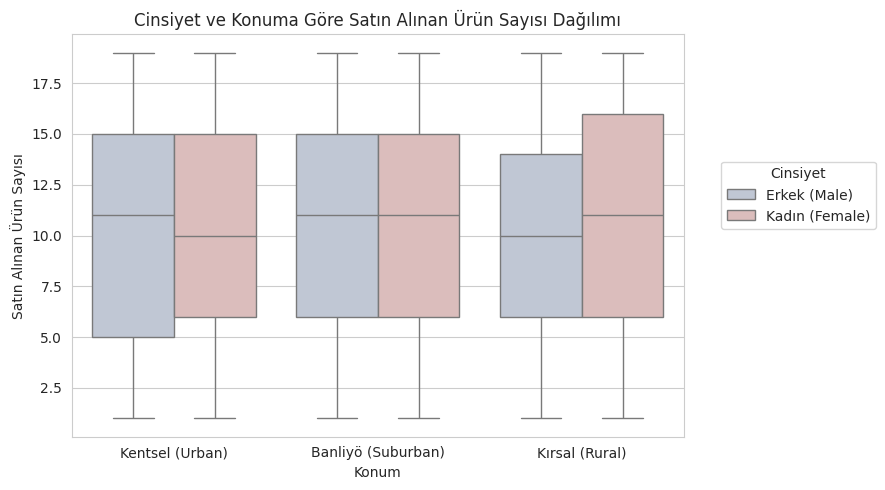

In [73]:
plt.figure(figsize=(9,5))
sns.set_style("whitegrid")
sns.boxplot(x="Location", y="Products_Purchased", hue="Gender", data=c_exp, palette="vlag")
plt.title("Cinsiyet ve Konuma Göre Satın Alınan Ürün Sayısı Dağılımı")
plt.xlabel("Konum")
plt.ylabel("Satın Alınan Ürün Sayısı")
plt.legend(title="Cinsiyet", bbox_to_anchor=(1.05, 0.5), loc='lower left')
plt.tight_layout()
plt.show()

Erkek ve kadınların bölge bazında dağılımı arasında büyük farklar bulunmamaktadır. Her iki cinsiyette de alışveriş yapan kullanıcılar oldukça çeşitli sayılarda ürün alma davranışı göstermektedir.

Tüm bölgelerde her iki cinsiyetin de ortanca satın alma sayıları **benzer**dir.
Ortalama satın alım sayısı kıyaslamasında ise tüm bölgelerde sayı kadınlarda erkeklerden **biraz daha yüksek**tir.

Genel olarak bölgeler arasında satın alınan ürün sayısı açısından özellikle erkekler açısından anlamlı bir fark görülmese de **kadınlar**ın tüm bölgelerde **biraz daha fazla alışveriş yapma eğiliminde** olduğu gözlenmektedir. Pazarlama stratejilerinde bu küçük farklar yine de dikkate alınabilir.

###**37. Cinsiyet (Gender), Konum (Location) ve Memnuniyet Puanı (Satisfaction_Score) İlişkisi**

In [74]:
c_exp.groupby(["Location","Gender"])["Satisfaction_Score"].agg(["mean","median","min","max"]).round(2)

mean  median  min  max
Location           Gender                                
Banliyö (Suburban) Erkek (Male)    5.36     5.0    1   10
                   Kadın (Female)  5.62     6.0    1   10
Kentsel (Urban)    Erkek (Male)    5.56     5.0    1   10
                   Kadın (Female)  5.62     6.0    1   10
Kırsal (Rural)     Erkek (Male)    5.50     5.0    1   10
                   Kadın (Female)  5.59     6.0    1   10

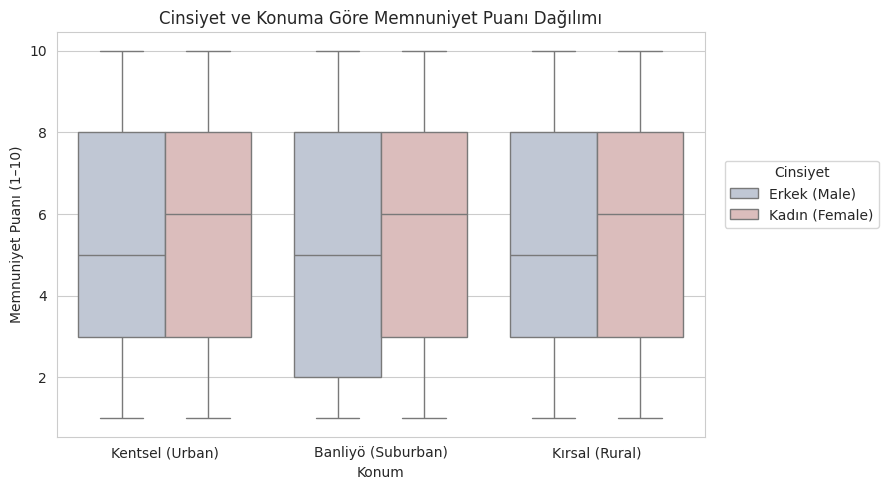

In [75]:
plt.figure(figsize=(9,5))
sns.set_style("whitegrid")
sns.boxplot(x="Location", y="Satisfaction_Score", hue="Gender", data=c_exp, palette="vlag")
plt.title("Cinsiyet ve Konuma Göre Memnuniyet Puanı Dağılımı")
plt.xlabel("Konum")
plt.ylabel("Memnuniyet Puanı (1–10)")
plt.legend(title="Cinsiyet", bbox_to_anchor=(1.02, 0.5), loc='lower left')
plt.tight_layout()
plt.show()

Tüm bölgelerde kadınların ortanca memnuniyet puanı **6**, erkeklerin ise **5** civarında olup, Cinsiyet farkının küçük ama tutarlı olduğu görülmektedir. Cinsiyetten bağımsız olarak ise bölgeler arasında memnuniyet farkı **çok belirgin değil**dir. Buna göre **kadınların, konumdan bağımsız olarak erkeklere göre ortalamada biraz daha memnun** olduğu ve memnuniyet puanı için konumdan ziyade **cinsiyet**in daha belirgin bir etkisinin olduğu ifade edilebilir.

###**38. Cinsiyet (Gender), Konum (Location) ve Müşteri Durumu (Retention_Status) İlişkisi**

In [76]:
c_exp.groupby(["Gender", "Location"])["Retention_Status_Encoded"].value_counts(normalize=True).unstack().round(2)

Retention_Status_Encoded              0     1
Gender         Location                      
Erkek (Male)   Banliyö (Suburban)  0.28  0.72
               Kentsel (Urban)     0.33  0.67
               Kırsal (Rural)      0.28  0.72
Kadın (Female) Banliyö (Suburban)  0.26  0.74
               Kentsel (Urban)     0.39  0.61
               Kırsal (Rural)      0.30  0.70

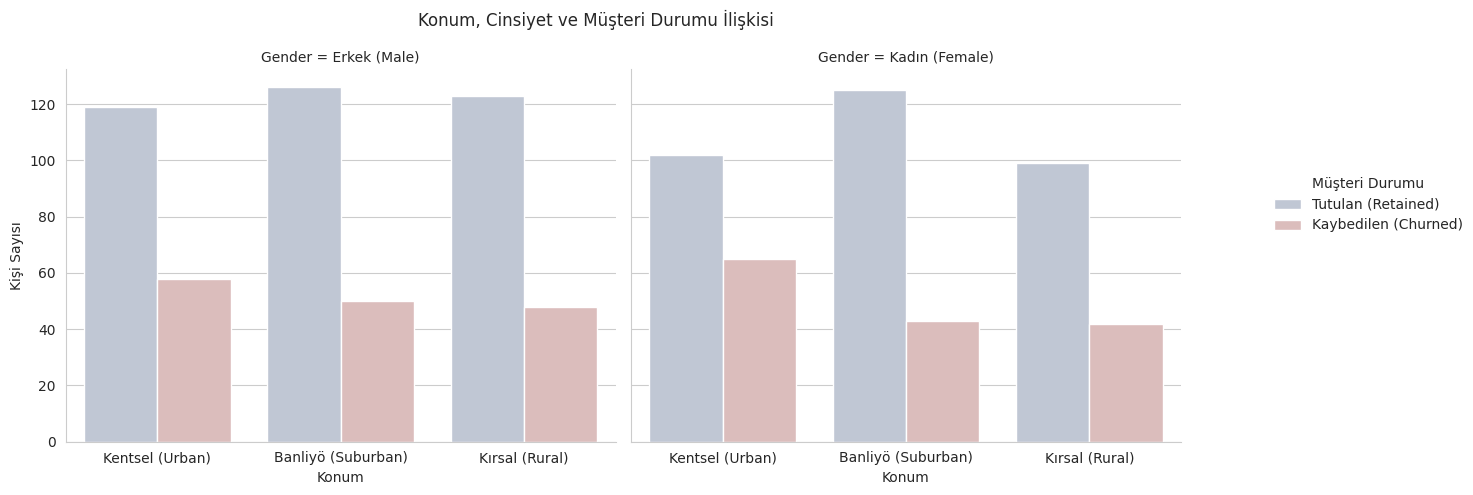

In [77]:
sns.set_style("whitegrid")
gr_38 = sns.catplot(x="Location", hue="Retention_Status", col="Gender",
        kind="count", data=c_exp, palette="vlag", height=5, aspect=1)
gr_38.set_axis_labels("Konum", "Kişi Sayısı")
gr_38.fig.suptitle("Konum, Cinsiyet ve Müşteri Durumu İlişkisi", size=12)
gr_38._legend.set_title("Müşteri Durumu")
gr_38._legend.set_bbox_to_anchor((1.05, 0.5))
gr_38._legend.set_loc("lower left")
plt.tight_layout()
plt.show()

Cinsiyet bazında müşteri elde tutma oranlarına bakıldığında **kadın müşteriler**in, kırsal ve banliyö bölgelerde **daha sadık**, ancak şehir merkezlerinde **daha fazla kaybedilme riski taşıyor** olduğu ifade edilebilir. **Erkek müşteriler**de ise sadakat genel olarak **kadınlara göre daha istikrarlı** ama **şehirde yine daha düşük** şeklinde özetlenebilir.

Grafiğin geneline bakıldığında **banliyö ve kırsal bölgelerde sadakat oranı daha yüksek** olup, özellikle **kadın müşterilerde bu oran %74’e ulaşmaktadır**.**Kentsel bölgelerde ise kadınlar için sadakat oranı %61’e kadar düşmektedir**.O halde müşteri stratejilerinde, özel kampanya ve bağlılık çalışmalarında **özellikle banliyö ve kırsalda kadın müşterilere odaklanmak**, müşteri kaybını azaltabilir. **Kentler**de ise **kadın müşterilere özel müşteri elde tutma kampanyaları uygulanabilir**

###**39. Yaş (Age), Cinsiyet (Gender), Satın Alınan Ürün Sayısı (Products_Purchased) İlişkisi**

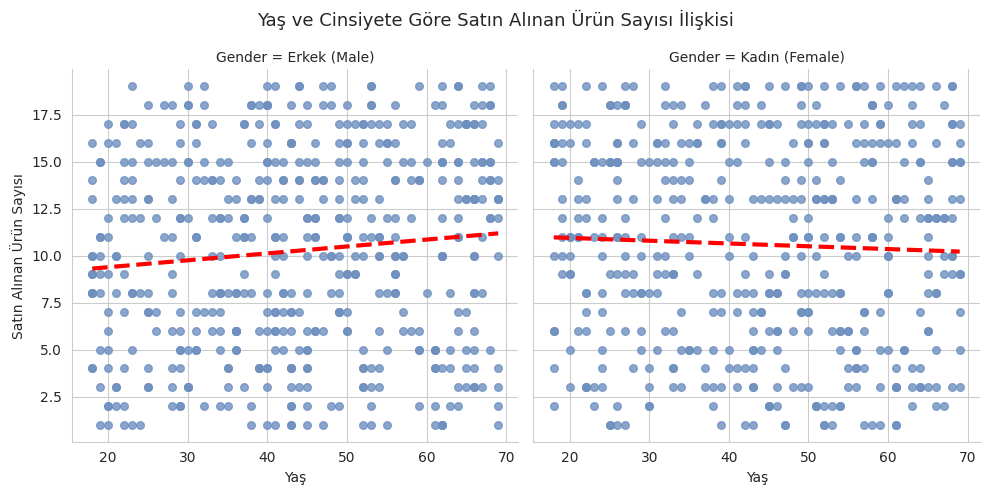

In [78]:
sns.set_style("whitegrid")
gr_39 = sns.lmplot(x="Age", y="Products_Purchased",col="Gender", data=c_exp, palette="vlag", height=5, aspect=1,
           scatter_kws={'s':30,'color':'#6e90bf'}, ci=None, line_kws={'color':'red','lw':3,'ls':'--'})
gr_39.set_axis_labels("Yaş", "Satın Alınan Ürün Sayısı")
gr_39.fig.suptitle("Yaş ve Cinsiyete Göre Satın Alınan Ürün Sayısı İlişkisi", size=13)
plt.tight_layout()
plt.show()

Yaş ilerledikçe satın alınan ürün sayısı **erkeklerde çok hafif artış** eğilimindeyken, **kadınlarda çok hafif bir azalma** görülmektedir. Ancak **her iki cinsiyette yaşla bağlı güçlü bir satın alma değişimi gözlemlenmemektedir.**

###**40. Yaş (Age), Cinsiyet (Gender) ve Memnuniyet Puanı (Satisfaction_Score) İlişkisi**

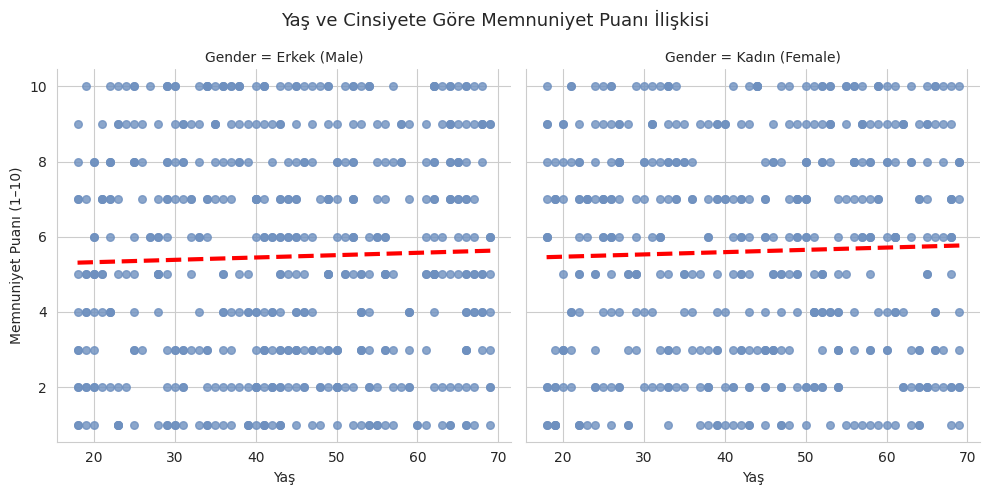

In [79]:
sns.set_style("whitegrid")
gr_40 = sns.lmplot(x="Age", y="Satisfaction_Score", col="Gender", data=c_exp,palette="vlag", height=5, aspect=1,
        scatter_kws={'s':30,'color':'#6e90bf'},ci=None,line_kws={'color':'red', 'linewidth':3, 'linestyle':'--'})
gr_40.set_axis_labels("Yaş", "Memnuniyet Puanı (1–10)")
gr_40.fig.suptitle("Yaş ve Cinsiyete Göre Memnuniyet Puanı İlişkisi", size=13)
plt.tight_layout()
plt.show()

Her iki cinsiyette de yaş arttıkça memnuniyet puanı **hafifçe artma eğiliminde** olup, bu artış oldukça zayıf ve yataydadır. Özetle, yaş ilerledikçe memnuniyet hafifçe artıyor olsa da bu **çok belirgin değildir** ve **cinsiyete göre memnuniyet farkı da yok denecek kadar azdır**.

###**41. Yaş (Age), Cinsiyet (Gender) ve Müşteri Durumu (Retention_Status) İlişkisi**

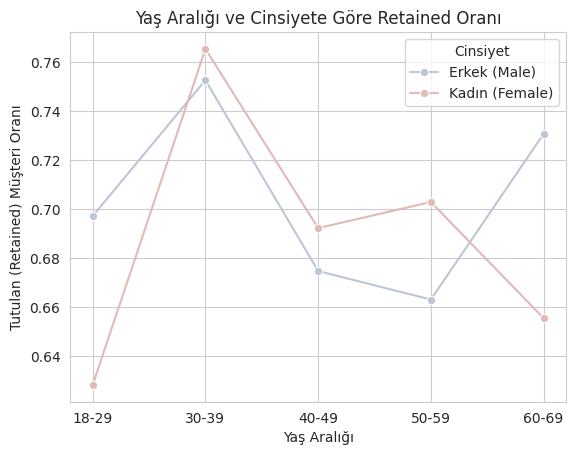

In [80]:
tmp = c_exp.assign(AgeBin=pd.cut(c_exp["Age"],
                bins=[18,30,40,50,60,70],
                right=False, include_lowest=True,
                labels=["18-29","30-39","40-49","50-59","60-69"]))\
    .groupby(["Gender", "AgeBin"], observed=False, as_index=False)\
    .agg(RetainedRate=("Retention_Status", lambda s: (s=="Tutulan (Retained)").mean()),
     Count=("Retention_Status", "size"))


gr_41 = sns.lineplot(x="AgeBin", y="RetainedRate", hue="Gender", marker="o", palette="vlag", data=tmp)
gr_41.set_title("Yaş Aralığı ve Cinsiyete Göre Retained Oranı")
gr_41.set_xlabel("Yaş Aralığı")
gr_41.set_ylabel("Tutulan (Retained) Müşteri Oranı")
gr_41.legend(title="Cinsiyet")
plt.show()

Yaş aralıkları 10 yıllık aralıklarla gruplandığında:

**30–39 yaş grubu**nun, her iki cinsiyette de **en sadık müşteri** segmenti olduğu ve kadınlarda yaş ilerledikçe sadakat oranı düşerken, erkeklerde son yaş grubunda artışın olduğu görülmektedir. Bu veriler, yaş ve cinsiyet temelli **müşteri sadakati stratejileri** oluşturmak için önemli bir temel olarak değerlendirilebilir.

###**42. Yaş (Age), Konum (Location) ve Müşteri Durumu (Retention_Status) İlişkisi**

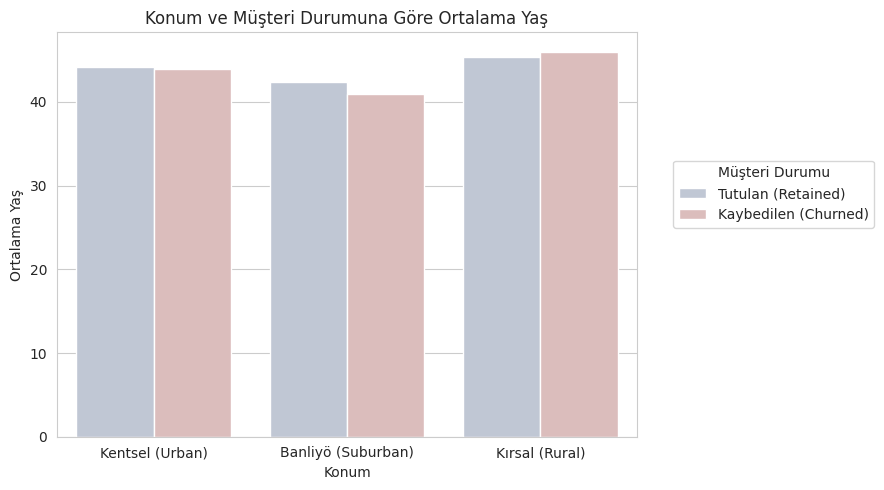

In [81]:
c_exp["Age_Bin"] = pd.cut(c_exp["Age"], bins=[18, 30, 40, 50, 60, 70],labels=["18-30", "31-40", "41-50", "51-60", "61-70"])
plt.figure(figsize=(9,5))
sns.set_style("whitegrid")
sns.barplot(x="Location", y="Age", hue="Retention_Status", data=c_exp, estimator="mean", errorbar=None, palette="vlag", dodge=True)

plt.title("Konum ve Müşteri Durumuna Göre Ortalama Yaş")
plt.xlabel("Konum")
plt.ylabel("Ortalama Yaş")
plt.legend(title="Müşteri Durumu",bbox_to_anchor=(1.05,0.5), loc="lower left")
plt.tight_layout()
plt.show()

Grafik **her bölge** için **Tutulan (Retained)** ve **Kaybedilen (Churned)** müşterilerin **ortalama yaşlarını** karşılaştırmaktadır. **Ortalama yaşlar bölge bazında küçük farklılıklar göstermektedir**.

Yaş ve müşteri durumları arasında **bölgelere bağlı olarak çok küçük farklar gözlenmekle**  birlikte genel olarak **yaş ortalamaları birbirine oldukça yakın** olduğu görülmektedir. O halde bu grafiğin tek başına **"müşteri kaybı veya kazanımı yaşa doğrudan bağlıdır"** sonucunu vermediği, ancak **kırsal bölgede yaş arttıkça müşteri kaybı eğiliminin hafifçe arttığı** söylenebilir.

Bu analiz, yaş faktörünün **tek başına belirleyici olmadığını**, ancak bölgeyle birlikte incelendiğinde anlamlı farklılıklar doğurabileceğini gösteriyor.

###**43. Etkileşim Sayısı (Num_Interactions), Müşteri Durumu (Retention_Status) ve Geri Bildirim Puanı (Feedback_Score) İlişkisi**

In [82]:
c_exp.groupby("Retention_Status", as_index=False).agg(Avg_Interactions=('Num_Interactions','mean')\
,Avg_Feedback=('Feedback_Score','mean'),Count=('Retention_Status','size')).round(2)

,Retention_Status,Avg_Interactions,Avg_Feedback,Count
0,Kaybedilen (Churned),7.35,2.88,306
1,Tutulan (Retained),7.63,3.03,694


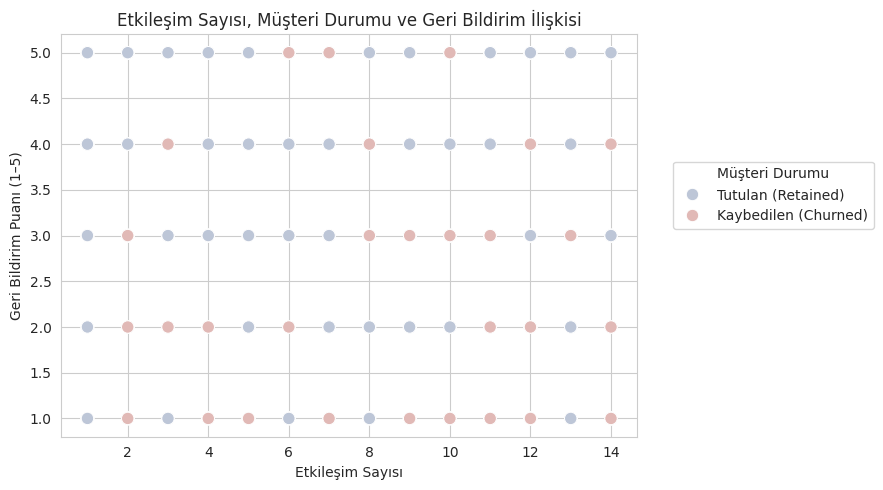

In [83]:
plt.figure(figsize=(9,5))
sns.set_style("whitegrid")
sns.scatterplot(x="Num_Interactions", y="Feedback_Score",hue="Retention_Status", data=c_exp, palette="vlag",alpha=1.0, s=80)\
.set(title="Etkileşim Sayısı, Müşteri Durumu ve Geri Bildirim İlişkisi",xlabel="Etkileşim Sayısı",ylabel="Geri Bildirim Puanı (1–5)")
plt.legend(title="Müşteri Durumu", bbox_to_anchor=(1.05,0.5), loc="lower left")
plt.tight_layout()
plt.show()

**Tutulan müşteriler (mavi)** daha yüksek geri bildirim puanlarına ve daha yoğun etkileşim sayılarına sahip iken **kaybedilen müşterilerin (pembe)** çoğunlukla daha düşük puanlarda ve etkileşim sayılarına sahip olduğu görülmektedir.Buna göre, **geri bildirim puanı ve etkileşim sayısı arttıkça müşterinin elde tutulma olasılığı da artıyor** gibi göründüğü yorumunu yapmak mümkündür.

###**44. Sitede Geçirilen Süre (Time_Spent_on_Site), Müşteri Durumu (Retention_Status) ve Satın Alınan Ürün Sayısı (Products_Purchased) İlişkisi**

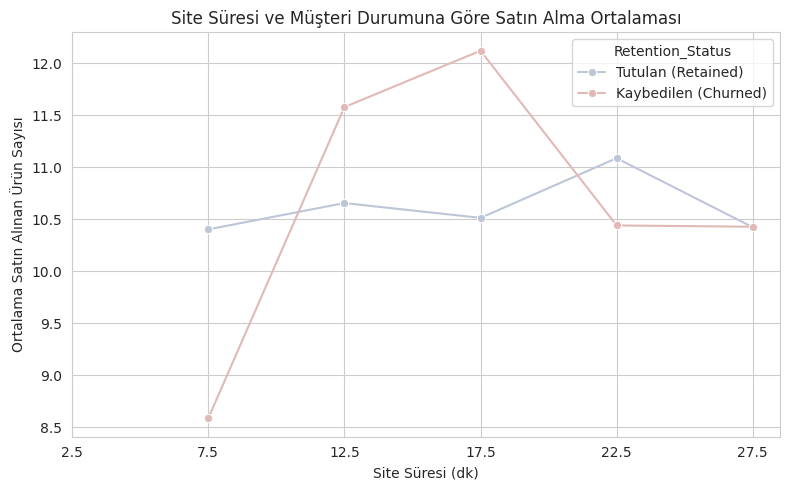

In [84]:
plt.figure(figsize=(8,5))
sns.set_style("whitegrid")
age_bins = [0,5,10,15,20,25,30]
mid_points = [2.5, 7.5, 12.5, 17.5, 22.5, 27.5]
tmp = (c_exp.assign(TimeBin=pd.cut(c_exp["Time_Spent_on_Site"], bins=age_bins, include_lowest=True),MidTime = pd.cut(c_exp["Time_Spent_on_Site"]\
      ,bins=age_bins, include_lowest=True).cat.rename_categories(mid_points).astype(float)))
sns.lineplot(x="MidTime", y="Products_Purchased", hue="Retention_Status",data=tmp, estimator="mean", errorbar=None, marker="o", palette="vlag")
plt.title("Site Süresi ve Müşteri Durumuna Göre Satın Alma Ortalaması")
plt.xlabel("Site Süresi (dk)")
plt.ylabel("Ortalama Satın Alınan Ürün Sayısı")
plt.xticks(mid_points)
plt.tight_layout()
plt.show()

**Tutulan (Retained)** müşterilerde ortalama satın alma neredeyse tüm zaman dilimlerinde dengeli ve yüksekken, **Kaybedilen (Churned)** müşteriler arasında süre farkının satın almaya etkisi olduğu görülmektedir. Bu durum özellikle **[5, 10)** dakika grubundakiler için oldukça belirgindir.

Yine belirgin bir şekilde, **sitede geçirilen süre arttıkça satın alma sayısının da arttığı** gözlenmektedir. Ancak bu etki tutulan müşteriler için daha nettir.O halde **sitede geçirdiği süre 15 dakikanın üzerinde** olan müşterilerin genellikle daha fazla satın alma davranışı gösterdiği iddia edilebilir. Bu durum, **sitede geçirilen süreyi artırmaya yönelik stratejilerin**, özellikle müşteri sadakati açısından değerli olabileceğini göstermetedir.

 *** *Sitede geçirilen süre için yaptığımız ilk analizlerde bu sürenin tek başına satın alma davranışı üzerinde güçlü bir etkisi olmadığı görülmekteydi. Ancak kullanıcılar Müşteri Durumu (Retention_Status) gibi segmentlere ayrılarak incelendiğinde, özellikle tutulan müşteriler için site süresi ile satın alma arasında anlamlı ilişkiler gözlenmektedir. Bu durum, kullanıcı davranışlarının daha doğru analiz edilebilmesi için segment bazlı yaklaşımların önemini ortaya koymaktadır.*

###**45. Geri Bildirim Puanı (Feedback_Score), Müşteri Durumu (Retention_Status) ve Satın Alınan Ürün Sayısı (Products_Purchased) İlişkisi**

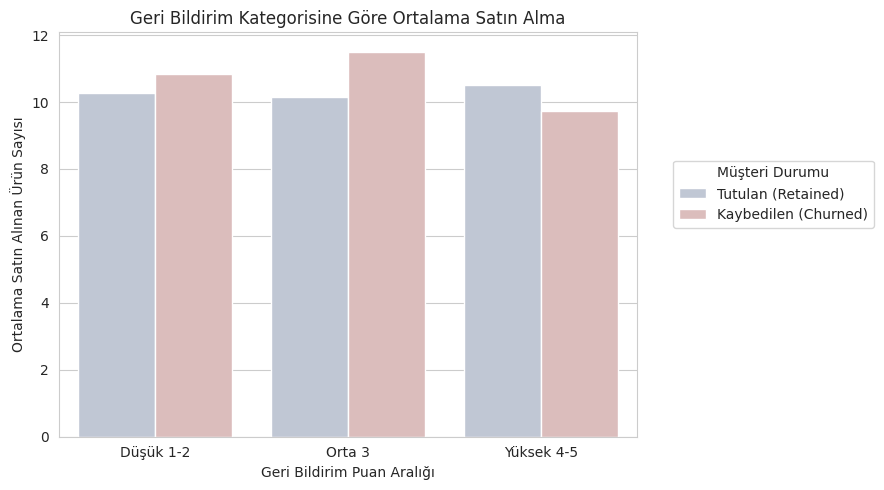

In [85]:
plt.figure(figsize=(9,5)); sns.set_style("whitegrid")
sns.barplot(x="FB_Bin", y="Products_Purchased", hue="Retention_Status",
            data=c_exp.assign(FB_Bin=pd.cut(c_exp["Feedback_Score"],[0,2,3,5],
            labels=["Düşük 1-2","Orta 3","Yüksek 4-5"])),
            palette="vlag", dodge=True, estimator="mean", errorbar=None)

plt.title("Geri Bildirim Kategorisine Göre Ortalama Satın Alma")
plt.xlabel("Geri Bildirim Puan Aralığı")
plt.ylabel("Ortalama Satın Alınan Ürün Sayısı")
plt.legend(title="Müşteri Durumu", bbox_to_anchor=(1.05,0.5), loc="lower left")
plt.tight_layout()
plt.show()

**Kaybedilen (Churned)** müşteriler, geri bildirim puanı düşük (1–2) ve orta düzeyde (3) olduğunda **daha yüksek satın alma ortalaması** göstermektedir.
Buna karşın, geri bildirim puanı yüksek (4–5) olduğunda **tutulan (Retained)** müşteriler daha fazla ürün satın alma eğilimindedir. Bu durum, **memnuniyet düzeyine göre müşteri segmentlerinin satın alma davranışlarının farklılaştığını** göstermektedir.

Özellikle **yüksek memnuniyet puanı veren** müşterilerin tutulma oranı yüksekse daha fazla satın alma davranışı göstermesi, **müşteri memnuniyeti ve sadakatinin satın alma davranışı üzerindeki olumlu etkisini** ortaya koymaktadır.

###**46. Görüntülenen Ürün Sayısı (Products_Viewed), Satın Alınan Ürün Sayısı (Products_Purchased) ve Müşteri Durumu (Retention_Status) İlişkisi**

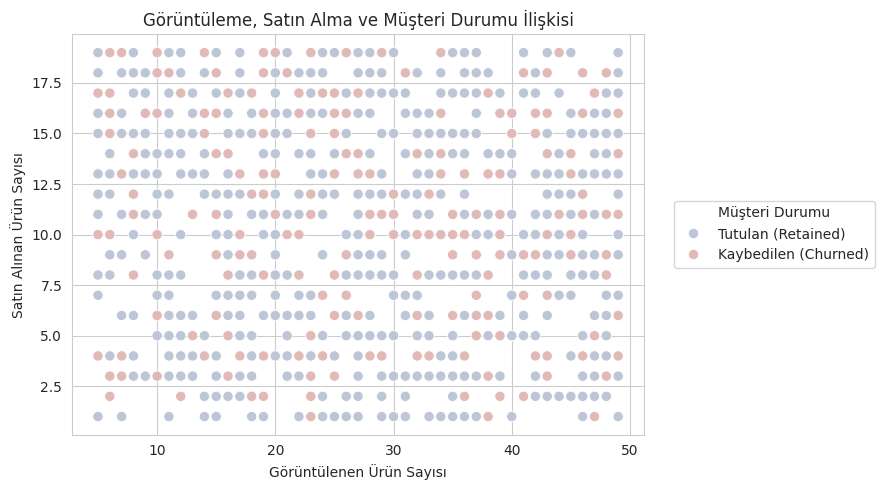

In [86]:
plt.figure(figsize=(9,5)); sns.set_style("whitegrid")
sns.scatterplot(x="Products_Viewed", y="Products_Purchased",hue="Retention_Status",palette="vlag", alpha=1, s=55,data=c_exp)

plt.title("Görüntüleme, Satın Alma ve Müşteri Durumu İlişkisi")
plt.xlabel("Görüntülenen Ürün Sayısı")
plt.ylabel("Satın Alınan Ürün Sayısı")
plt.legend(title="Müşteri Durumu", bbox_to_anchor=(1.04,0.4), loc="lower left")
plt.tight_layout()
plt.show()

**Görüntülenen ürün sayısı arttıkça** (sağa doğru gidildikçe), **satın alınan ürün sayısının da artma eğiliminde** olduğu gözlemlenmektedir. Özellikle 30 ve üzeri ürün görüntüleyen müşterilerin büyük bir kısmının, 10’dan fazla ürün satın aldığı fark edilmektedir. Bu durum, **ürünleri daha fazla inceleyen müşterilerin alışveriş yapma ihtimalinin daha yüksek olduğunu** göstermektedir. Renk dağılımına bakıldığında ise hem **tutulan (mavi)** hem de **kaybedilen (kırmızı)** müşteriler arasında bu eğilimin benzer olduğu, ancak **tutulan müşterilerde yoğunluğun daha yukarıda** gözlenmektedir.

Bu bulgular **ürün sayfalarında geçirilen sürenin artırılması ya da daha fazla ürün önerilmesi** gibi stratejilerin satışları olumlu yönde etkileyebileceğini düşündürmektedir.

###**47. Sitede Geçirilen Süre (Time_Spent_on_Site), Görüntülenen Ürün Sayısı (Products_Viewed) ve Memnuniyet Puanı (Satisfaction_Score) İlişkisi**

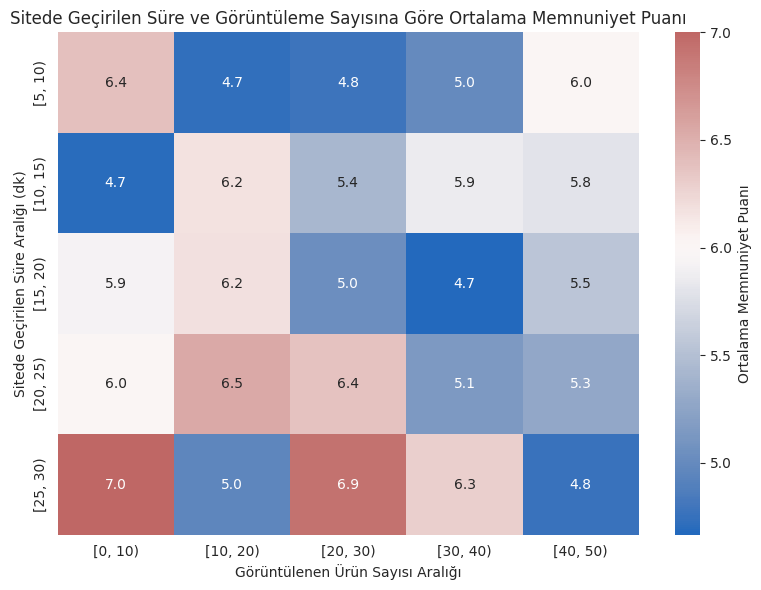

In [87]:
c_exp['Time_Bin'] = pd.cut(c_exp['Time_Spent_on_Site'], bins=[0,5,10,15,20,25,30], right=False)
c_exp['View_Bin'] = pd.cut(c_exp['Products_Viewed'], bins=[0,10,20,30,40,50], right=False)

heat_data = c_exp.groupby(['Time_Bin', 'View_Bin'], observed=True)['Satisfaction_Score'].mean().unstack()

plt.figure(figsize=(8,6))
sns.heatmap(heat_data, annot=True, fmt=".1f", cmap="vlag", center=6, cbar_kws={'label': 'Ortalama Memnuniyet Puanı'})
plt.title("Sitede Geçirilen Süre ve Görüntüleme Sayısına Göre Ortalama Memnuniyet Puanı")
plt.xlabel("Görüntülenen Ürün Sayısı Aralığı")
plt.ylabel("Sitede Geçirilen Süre Aralığı (dk)")
plt.tight_layout()
plt.show()

Bu analizde, **iki kategorik değişkenin (süre ve ürün sayısı aralığı)** kesiştiği her hücrede **ortalama bir değer (memnuniyet puanı)** incelenmektedir.
  - **En yüksek memnuniyet puanları 7.0 ve 6.9**, hem **[25, 30) dk site süresi** hem de **[0, 10) ile [20, 30) ürün görüntüleme** aralıklarında yer alan müşteriler tarafından verilmiştir.
  - **[20, 25) dk süre** aralığı genel olarak **daha tutarlı yüksek memnuniyet** ile ilişkilidir (özellikle 10-30 arası görüntüleme sayısında).
  - **Daha fazla ürün görüntüleyen kullanıcıların memnuniyeti genellikle düşme eğiliminde** olduğu görülmektedir. Örneğin, **[40, 50] ürün** görüntüleyenlerde memnuniyet puanı sıklıkla **5.5’in altına** düşmektedir. Bu durum, kullanıcıların **çok sayıda ürün inceleyip aradığını bulamaması veya kararsız kalması** gibi olasılıkları düşündürebilir.

Genel olarak değerlendirildiğibde **sitede geçirilen sürenin artması**nın memnuniyeti artırıcı etkiye sahipken, **görüntüleme sayısının çok artması**nın memnuniyetin düşmesine yol açabildiği söylenebilir. Bu durum, alışveriş deneyiminin hedefli ve kontrollü olmasıyla memnuniyet arasında olumlu bir ilişki olabileceğini düşündürmektedir.

###**48. Etkileşim Sayısı (Num_Interactions), Görüntülenen Ürün Sayısı (Products_Viewed) ve Satın Alınan Ürün Sayısı (Products_Purchased) İlişkisi**

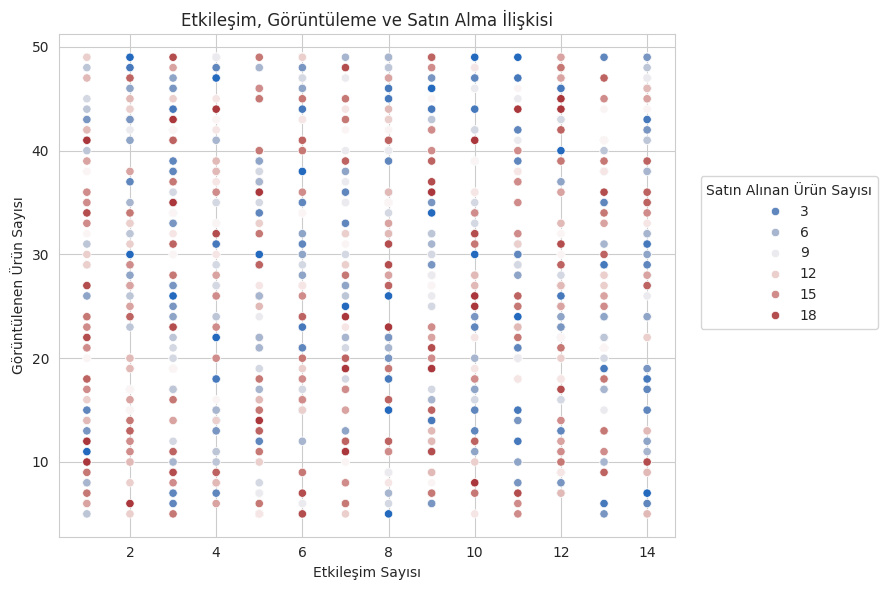

In [88]:
plt.figure(figsize=(9,6))
sns.set_style("whitegrid")
sns.scatterplot(x="Num_Interactions", y="Products_Viewed", hue="Products_Purchased", data=c_exp,palette="vlag", alpha=1)

plt.title("Etkileşim, Görüntüleme ve Satın Alma İlişkisi")
plt.xlabel("Etkileşim Sayısı")
plt.ylabel("Görüntülenen Ürün Sayısı")
plt.legend(title="Satın Alınan Ürün Sayısı", bbox_to_anchor=(1.03,0.4), loc="lower left")
plt.tight_layout()
plt.show()

Genel olarak, **görüntülenen ürün sayısı arttıkça satın alınan ürün sayısının da arttığı** gözlenmektedir. Bu durum, yukarı doğru yayılan kırmızımsı tonlu noktalarla anlaşılmaktadır.

Benzer şekilde, **etkileşim sayısı yüksek kullanıcılar**, düşük etkileşimlilere göre **daha geniş bir satın alma aralığına yayılmış** görünmektedir.

**Koyu kırmızı noktalar** (yüksek satın alma) daha çok **yüksek etkileşim ve yüksek görüntüleme** kesişimlerinde yoğunlaşmıştır. Bu da hem daha fazla etkileşim kuran hem de daha çok ürün inceleyen kullanıcıların **satın alma davranışı gösterme ihtimalinin daha yüksek olduğunu** işaret etmektedir.

Grafik, kullanıcıların **satın alma davranışlarının hem etkileşim hem de görüntüleme sayısı** ile birlikte değerlendirilmesi gerektiğini göstermektedir.

*Daha önce Görüntülenen Ürün Sayısı ve Satın Alınan Ürün Sayısı ilişkisini incelediğimiz 32 no.lu grafikte, görüntüleme sayısının tek başına satın alımı artırmadığını görmüştük.*

###**49. Geri Bildirim Puanı (Feedback_Score), Memnuniyet Puanı (Satisfaction_Score) ve Müşteri Durumu (Retention_Status) İlişkisi**

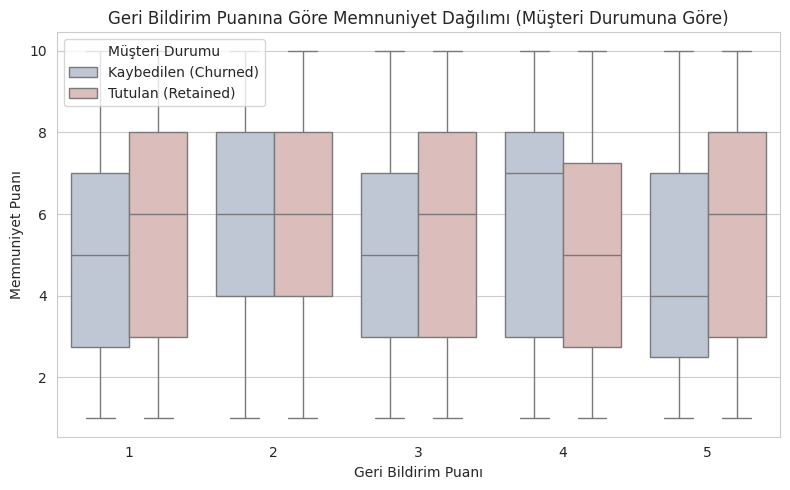

In [89]:
plt.figure(figsize=(8,5))
sns.set_style("whitegrid")

sns.boxplot(x="Feedback_Score", y="Satisfaction_Score", hue="Retention_Status", data=c_exp, palette="vlag")

plt.title("Geri Bildirim Puanına Göre Memnuniyet Dağılımı (Müşteri Durumuna Göre)")
plt.xlabel("Geri Bildirim Puanı")
plt.ylabel("Memnuniyet Puanı")
plt.legend(title="Müşteri Durumu", loc="upper left")
plt.tight_layout()
plt.show()

Genel olarak, **geri bildirim puanı ile memnuniyet puanı arasında pozitif yönlü bir ilişki** olduğu gözlemlenmektedir. Yani yüksek geri bildirim puanı veren kullanıcılar genellikle daha yüksek memnuniyet puanı da vermektedir. **Tutulan (Retained)** müşterilerin memnuniyet puanlarının **daha geniş bir aralıkta ve daha yüksek değerlerde** toplandığı dikkat çekmektedir. Bu grup özellikle **geri bildirim puanı 4 ve 5** olduğunda **8-10 arası memnuniyet puanı** vermeye daha yatkındır. Öte yandan, **Kaybedilen (Churned)** müşterilerde memnuniyet puanları genellikle **orta ve düşük seviyelerde (4-7 arası)** yoğunlaşmaktadır. Bu durum, **düşük memnuniyet puanlarının müşteri kaybıyla ilişkili olabileceğine** işaret etmektedir.

Bu bulgular, **geri bildirim sürecinin ve memnuniyet takibinin, müşteri sadakatini artırma açısından stratejik önem taşıdığını** göstermektedir.

###**50. Satın Alınan Ürün Sayısı (Products_Purchased), Memnuniyet Puanı (Satisfaction_Score) ve Müşteri Durumu (Retention_Status) İlişkisi**

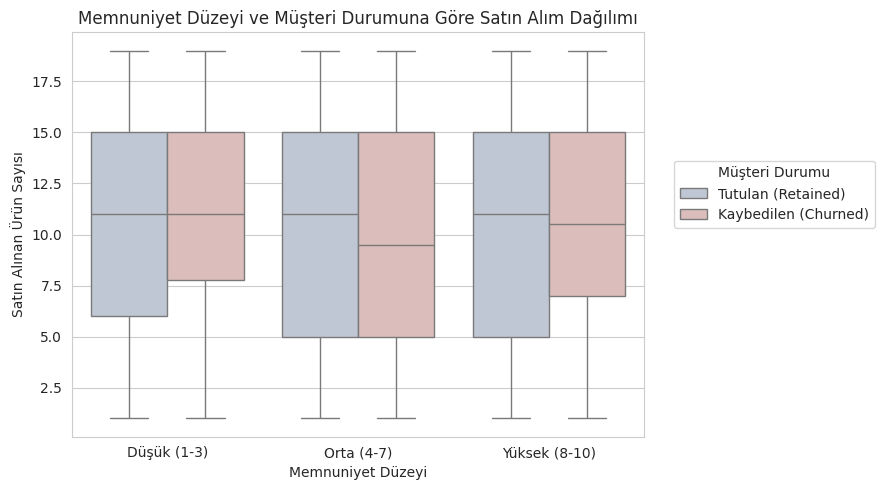

In [90]:
c_exp["Satisfaction_Bin"] = pd.cut(c_exp["Satisfaction_Score"],bins=[0, 3, 7, 10],
                            labels=["Düşük (1-3)", "Orta (4-7)", "Yüksek (8-10)"], right=True)

plt.figure(figsize=(9,5))
sns.set_style("whitegrid")

sns.boxplot(x="Satisfaction_Bin", y="Products_Purchased", hue="Retention_Status",
            data=c_exp, palette="vlag")

plt.title("Memnuniyet Düzeyi ve Müşteri Durumuna Göre Satın Alım Dağılımı")
plt.xlabel("Memnuniyet Düzeyi")
plt.ylabel("Satın Alınan Ürün Sayısı")
plt.legend(title="Müşteri Durumu", bbox_to_anchor=(1.04, 0.5), loc="lower left")
plt.tight_layout()
plt.show()

**Tutulan (Retained)** müşteriler, her memnuniyet düzeyinde genellikle **daha yüksek medyan** değerine ve **daha tutarlı (daha dar)** bir dağılıma sahiptir.
**Kaybedilen (Churned)** müşterilerin satın alma davranışı daha dağınık ve geniş aralıklarda seyretmektedir.
Bu durum, satın alma davranışında memnuniyetin etkisinin olabileceğini ancak müşteri sadakatinin de önemli bir rol oynadığını göstermektedir.

#Sonuç

Bu analiz çalışmasında, müşteri davranışlarını etkileyen temel metrikler olan **etkileşim sayısı**, **görüntüleme**, **sitede geçirilen süre**, **geri bildirim puanı**, **memnuniyet düzeyi**, **müşteri durumu** ve **satın alınan ürün sayısı** arasındaki ilişkiler ayrı ayrı ve segment bazında detaylı şekilde incelenmiştir.

###Genel Çıkarımlar:

- **Etkileşim, Görüntüleme ve Satın Alma Arasındaki İlişki**:
  - Daha fazla etkileşimde bulunan kullanıcıların daha fazla ürün görüntülediği ve genellikle daha fazla satın alma eğilimi gösterdiği gözlemlenmiştir.

- **Sitede Geçirilen Süre**:
  - Özellikle **15 dakika ve üzeri** sitede kalan kullanıcıların daha fazla ürün satın aldığı tespit edilmiştir. Bu etki tutulan müşterilerde daha da belirgindir. Dolayısıyla sitede kalma süresinin artırılması, satışlara doğrudan katkı sağlayabilir.

- **Memnuniyet ve Sadakat**:
  - Yüksek memnuniyet puanları tutulan müşteri grubunda daha sık görülmektedir. Aynı memnuniyet düzeyine sahip olsalar bile tutulan müşterilerin daha fazla ürün satın alma eğiliminde olduğu gözlemlenmiştir.
  - Geri bildirim puanı ve memnuniyet puanı arasında pozitif yönlü bir ilişki mevcuttur. Bu da geri bildirimlerin doğru şekilde izlenmesinin memnuniyet yönetimi açısından önemini ortaya koymaktadır.

- **Geri Bildirim ve Memnuniyetin Dağılımı**:
  - Tutulan müşterilerde memnuniyet puanları genellikle daha geniş bir aralıkta ve yüksek seviyelerde toplanırken, kaybedilen müşterilerde memnuniyet puanları daha düşüktür. Bu durum, müşteri memnuniyetinin kayıp riskini azaltmada belirleyici bir faktör olduğunu göstermektedir.

- **Segment Bazlı Yaklaşımların Önemi**:
  - Heatmap gibi görselleştirmelerde; **site süresi** ve **görüntüleme sayısı** gibi metriklerin memnuniyet puanı üzerindeki etkisinin, müşteri segmentlerine göre değiştiği görülmüştür. Bu da tekil metrik analizlerinin yetersiz kalabileceğini ve **çok boyutlu segment analizlerine** ihtiyaç duyulduğunu ortaya koymaktadır.
  - **Kategorik segmentlerde** müşteri davranışları açısından küçük farklar bulunduğu gözlemlenmiş olup, dönemsel olarak **cinsiyet** ve **konum** bazlı çalışma ve kampanyaların, satılan ürün ve tutulan müşteri sayısını arttırmayı sağlayabileceği görülmektedir.  

###Öneriler:

- **Sadakat stratejileri** geliştirirken yalnızca memnuniyet puanı değil, sitede geçirilen süre, geri bildirim puanı ve etkileşim gibi diğer davranışsal veriler de birlikte değerlendirilmelidir.
- **Kritik eşikler** (örneğin 15 dakika üzeri sitede kalma, 20’den fazla ürün görüntüleme gibi) müşteri kaybetme riskinin düştüğü segmentleri tanımlamada kullanılabilir.
- **Geri bildirim ve memnuniyet sistemleri**, sadece içsel ölçümlemeler değil, aynı zamanda satış ve sadakat tahminleme aracı olarak da etkin biçimde yapılandırılmalıdır.
- **Tutulan müşteriler**, hemen her boyutta daha istikrarlı ve olumlu davranışlar göstermektedir. Bu gruba özel kampanyalar ve teşvik sistemleri ile müşteri değeri artırılabilir.

Sonuç olarak, analiz hedeflerine ulaşılmış, veri görselleştirmeleri yoluyla kullanıcı davranışlarının satın alma kararları üzerindeki etkileri kapsamlı biçimde ortaya konmuştur. Elde edilen bulgular, müşteri deneyimi optimizasyonunda stratejik adımlar için sağlam bir temel sunmaktadır.